##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number:*** 15

---
***Full names of all students in the team:*** Chirag Gadia , Abhimanyu Gautam , Priyanka Ranjan , Parth Gupta , Dev Gaur, Satwik Reddy

---
***Id number of all students in the team:***
2020A7PS1721H,
2020A4PS0973H,
2021A3PS2735H,
2020B4A72235H,
2020B5A72178H,
2020B5AA2270H

```
```



## <a name="data_collection">Data Preprocessing</a>

#### <a name="import_libraries">Import Libraries</a>



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import floor,ceil
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
pip install scikit-plot

In [ ]:
from scipy import stats
import scikitplot as skplt
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score


import warnings
warnings.simplefilter('ignore', DeprecationWarning)

### <a name="import-data">Import Data</a>

#Labelling the Dataset

The code reads data from a CSV file and performs column renaming for better clarity.

Mapping dictionaries are provided for categorical columns to make the data more interpretable.

In [ ]:
df=pd.read_csv("/content/Economic_Growth_Trend.csv")

headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age in years",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Risk"]

df.columns=headers
df.to_csv("german_data_credit_cat.csv",index=False)

# Mapping dictionaries

status_checking_account = {
    'A14': "no checking account",
    'A11': "<0 DM",
    'A12': "0 <= <200 DM",
    'A13': ">= 200 DM"
}

credit_history = {
    "A34": "critical account",
    "A33": "delay in paying off",
    "A32": "existing credits paid back duly till now",
    "A31": "all credits at this bank paid back duly",
    "A30": "no credits taken"
}

purpose = {
    "A40": "car (new)",
    "A41": "car (used)",
    "A42": "furniture/equipment",
    "A43": "radio/television",
    "A44": "domestic appliances",
    "A45": "repairs",
    "A46": "education",
    'A47': 'vacation',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'others'
}

saving_account = {
    "A65": "no savings account",
    "A61": "<100 DM",
    "A62": "100 <= <500 DM",
    "A63": "500 <= < 1000 DM",
    "A64": ">= 1000 DM"
}

present_employment = {
    'A75': ">=7 years",
    'A74': "4<= <7 years",
    'A73': "1<= < 4 years",
    'A72': "<1 years",
    'A71': "unemployed"
}

personal_status_sex = {
    'A95': "female:single",
    'A94': "male:married/widowed",
    'A93': "male:single",
    'A92': "female:divorced/separated/married",
    'A91': "male:divorced/separated"
}

other_debtors_guarantors = {
    'A101': "none",
    'A102': "co-applicant",
    'A103': "guarantor"
}

property_mapping = {
    'A121': "real estate",
    'A122': "savings agreement/life insurance",
    'A123': "car or other",
    'A124': "unknown / no property"
}

other_installment_plans = {
    'A143': "none",
    'A142': "store",
    'A141': "bank"
}

housing = {
    'A153': "for free",
    'A152': "own",
    'A151': "rent"
}

job = {
    'A174': "management/ highly qualified employee",
    'A173': "skilled employee / official",
    'A172': "unskilled - resident",
    'A171': "unemployed/ unskilled  - non-resident"
}

telephone = {
    'A192': "yes",
    'A191': "none"
}

foreign_worker = {
    'A201': "yes",
    'A202': "no"
}

risk_mapping = {
    1: "Good Risk",
    2: "Bad Risk"
}

# Applying mappings to DataFrame columns

df["Status of existing checking account"] = df["Status of existing checking account"].map(status_checking_account)
df["Credit history"] = df["Credit history"].map(credit_history)
df["Purpose"] = df["Purpose"].map(purpose)
df["Savings account/bonds"] = df["Savings account/bonds"].map(saving_account)
df["Present employment since"] = df["Present employment since"].map(present_employment)
df["Personal status and sex"] = df["Personal status and sex"].map(personal_status_sex)
df["Other debtors / guarantors"] = df["Other debtors / guarantors"].map(other_debtors_guarantors)
df["Property"] = df["Property"].map(property_mapping)
df["Other installment plans"] = df["Other installment plans"].map(other_installment_plans)
df["Housing"] = df["Housing"].map(housing)
df["Job"] = df["Job"].map(job)
df["Telephone"] = df["Telephone"].map(telephone)
df["foreign worker"] = df["foreign worker"].map(foreign_worker)
df["Risk"] = df["Risk"].map(risk_mapping)

## <a name="data_overview">Data Overview</a>

In [ ]:
df.head() #top 5 rows of the dataset

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Risk
0,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
1,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
2,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,4,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
3,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk
4,no checking account,36,existing credits paid back duly till now,education,9055,no savings account,1<= < 4 years,2,male:single,none,4,unknown / no property,35,none,for free,1,unskilled - resident,2,yes,yes,Good Risk


### <a name="data-types">Data Info</a>

In [ ]:
df.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       999 non-null    object
 1   Duration in month                                         999 non-null    int64 
 2   Credit history                                            999 non-null    object
 3   Purpose                                                   999 non-null    object
 4   Credit amount                                             999 non-null    int64 
 5   Savings account/bonds                                     999 non-null    object
 6   Present employment since                                  999 non-null    object
 7   Installment rate in percentage of disposable income       999 non-null    int64 
 8   Personal status and sex       

The dataset contains 999 entries with 21 attributes, a mix of categorical (14) and numerical (7) data. Key attributes include "Credit amount," "Duration in month," and "Age in years." "Risk" serves as the target variable, showcasing risk categorization as "Good Risk" or "Bad Risk." It's evident that categorical attributes hold various statuses like "Status of existing checking account," "Credit history," among others. Numerical attributes capture values such as installment rates, residence duration, and credit counts.

#Since all values are non-null, we are not replacing them with any mean or median values.


## <a name="summary_statistics">Table of Summary statistics</a>

### <a name="categorical-variable-stats">Categorical Variable</a>

#### Levels and Proportions

In [ ]:
column_names=df.columns.tolist()
column_names.remove("Credit amount") #numerical variable
column_names.remove("Age in years") #numerical variable
column_names.remove("Duration in month") #numerical variable
#----------------------------------------------------------------------------------------

column_names_cat={}
for name in column_names:
    column_names_cat[name]=len(df[name].unique().tolist())

marginal_report_cluster={}
for itr in range(0,np.asarray(list(column_names_cat.values())).max()+1):
    if [k for k,v in column_names_cat.items() if v == itr]:
        marginal_report_cluster[itr]=[k for k,v in column_names_cat.items() if v == itr]

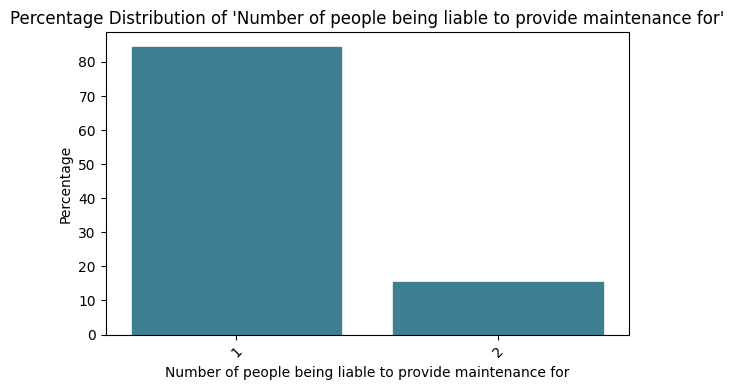

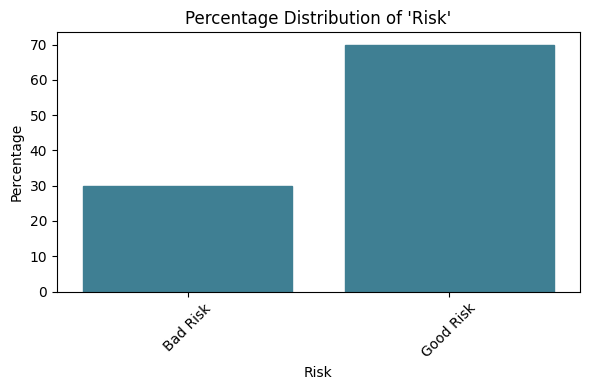

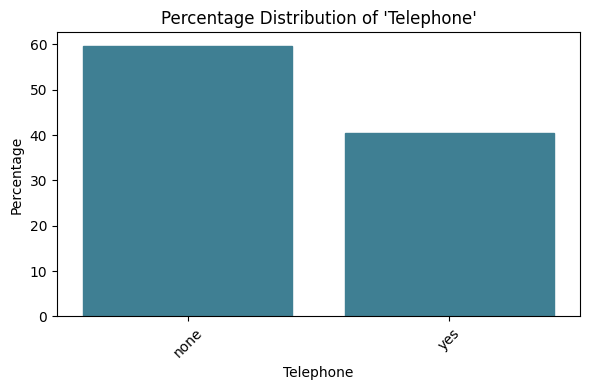

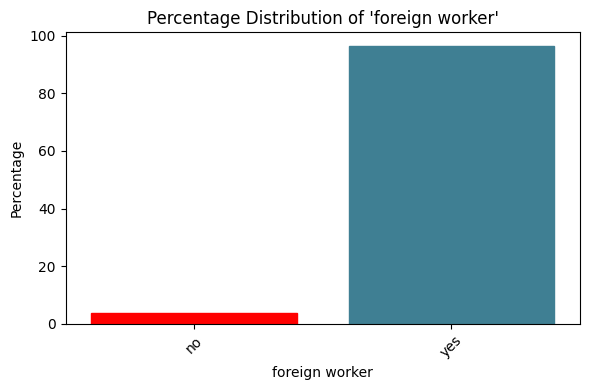

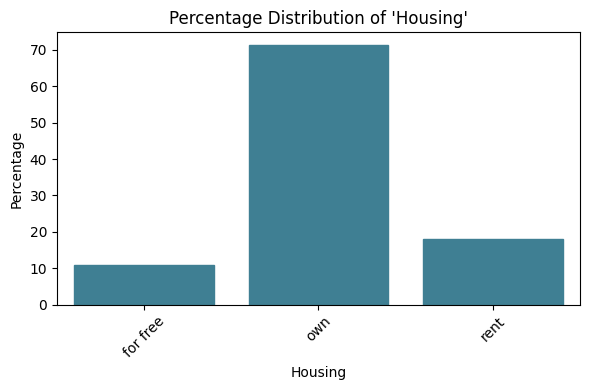

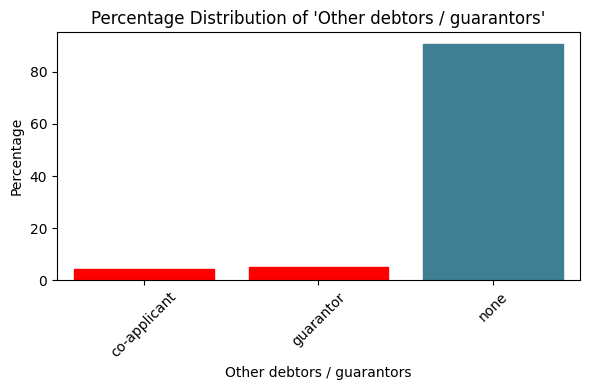

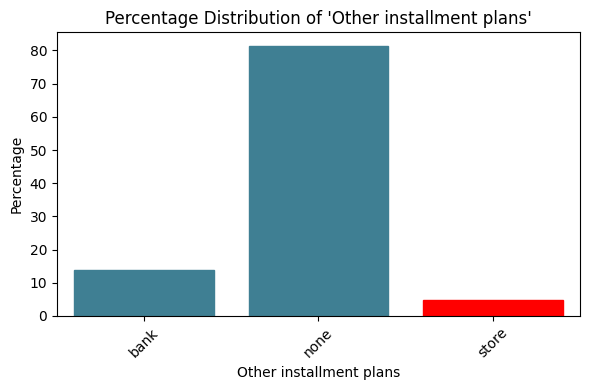

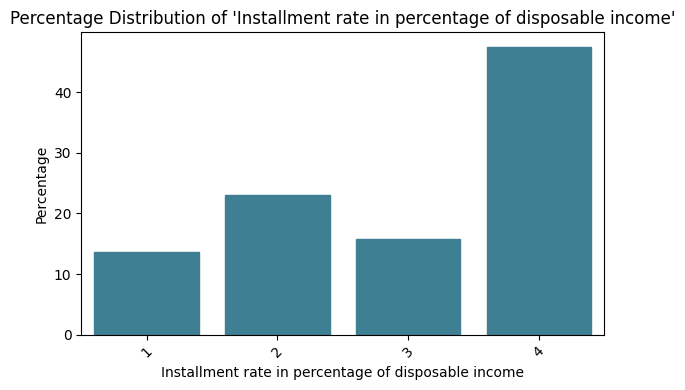

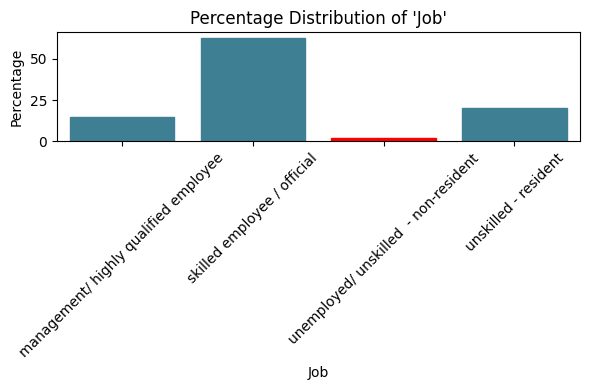

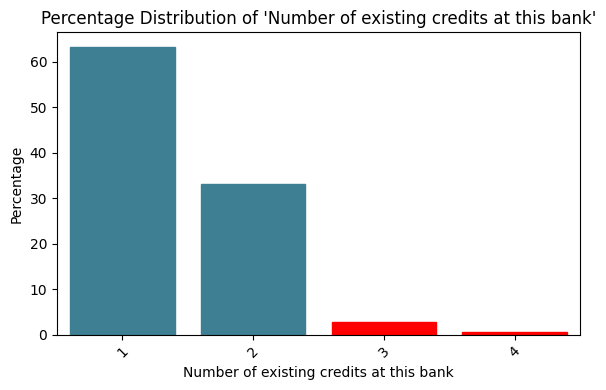

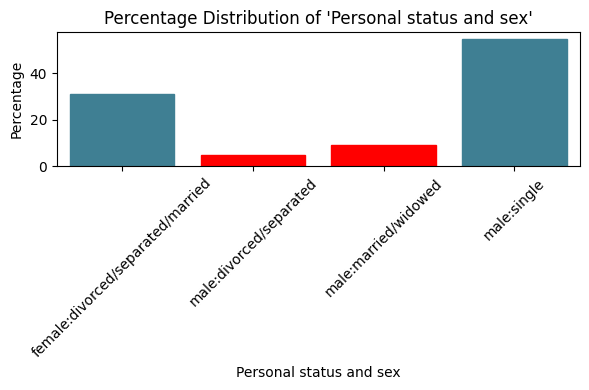

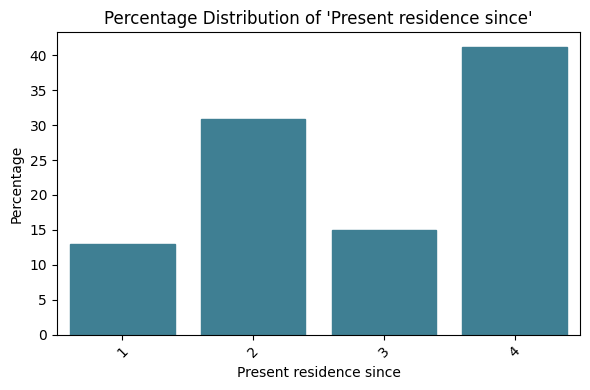

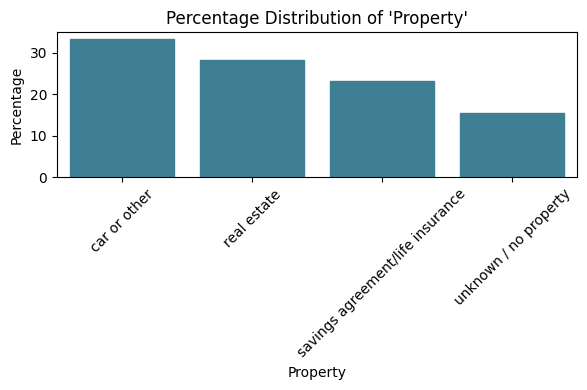

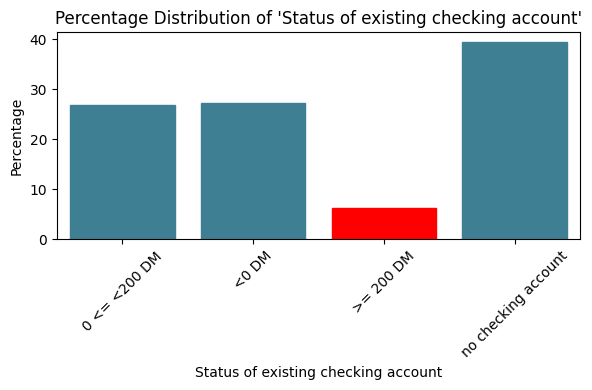

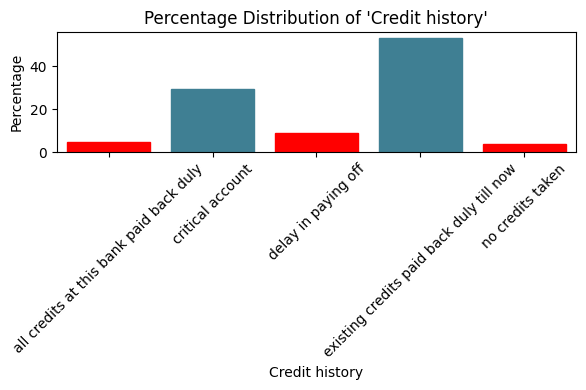

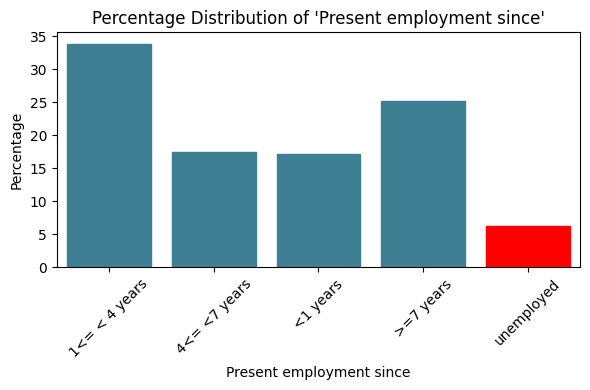

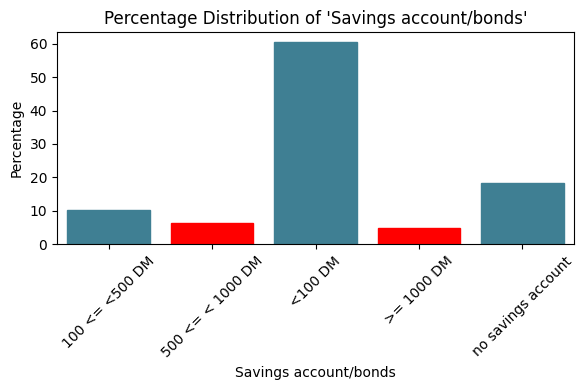

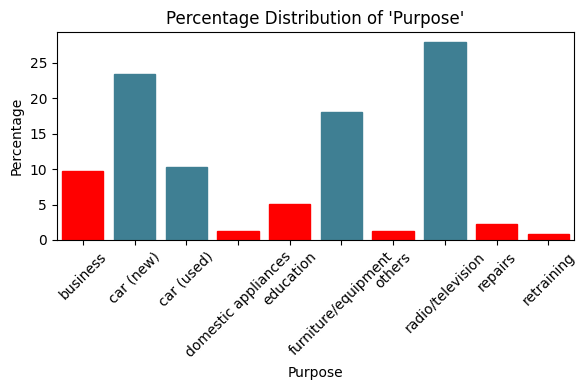

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Datapoints belonging to the categories having less than 10% are plotted in red
for key, columns in marginal_report_cluster.items():
    for col_name in sorted(columns):
        percentage_data = pd.crosstab(df[col_name], columns=["Percentage"]).apply(lambda r: (round((r / r.sum()) * 100, 2)), axis=0).reset_index()
        percentage_data.columns = [col_name, "Percentage"]

        # Visualize the percentage distribution with red for <10% and green for >=10%
        plt.figure(figsize=(6, 4))
        barplot = sns.barplot(x=col_name, y="Percentage", data=percentage_data)

        # Color bars based on the percentage values
        for bar, percent in zip(barplot.patches, percentage_data["Percentage"]):
            if percent < 10:
                bar.set_color('red')  # Below 10% in red
            else:
                bar.set_color('#3f7f93')  # 10% or above in green

        plt.title(f"Percentage Distribution of '{col_name}'")
        plt.xlabel(col_name)
        plt.ylabel("Percentage")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Data Attribute Refinement

We have conducted an analysis on our dataset and identified that many predictors are categorical with multiple levels. Some of these levels have limited observations. To improve the interpretability of the data, we have merged certain levels for specific attributes based on cell proportions provided in the one-way table.

## Other debtors / guarantors

Merged Levels:
- Co-applicant/guarantor
- None

## Other installment plans

Merged Levels:
- Bank/store
- None

## Job

Merged Levels:
- Employed
- Unemployed

## Number of existing credits at this bank

Merged Levels:
- One
- More than one

## Personal status and sex

Merged Levels:
- Male
- Female

## Status of existing checking account

Merged Levels:
- No checking account
- < 0 DM
- \> 0 DM

## Credit history

Merged Levels:
- All credit / existing credits paid back duly till now
- No credits taken
- Critical account/delay in paying off

## Savings account/bonds

Merged Levels:
- < 100 DM
- < 500 DM
- \> 500 DM
- No savings account

## Purpose

Merged Levels:
- New car
- Used car
- Home Related
- Other

## Present employment since

Merged Levels:
- < 1 year / unemployed
- 1 <= < 4 years
- 4 <= < 7 years
- \>= 7 years

These refined categories aim to provide a clearer and more consolidated representation of the data, enhancing the overall interpretability of the categorical attributes in our dataset.


In [ ]:
import pandas as pd

df = pd.read_csv("german_data_credit_cat.csv")

# Mapping dictionaries for categorical columns
number_of_credit = {1: 1, 2: 2, 3: 2, 4: 2}

status_of_existing_checking_account = {'A14': "no checking account", 'A11': "<0 DM", 'A12': ">0 DM", 'A13': ">0 DM"}

credit_history = {"A34": "critical account/delay in paying off", "A33": "critical account/delay in paying off",
                  "A32": "all credit / existing credits paid back duly till now",
                  "A31": "all credit / existing credits paid back duly till now", "A30": "no credits taken"}

purpose = {"A40": "car (new)", "A41": "car (used)", "A42": "Home Related", "A43": "Home Related", "A44": "Home Related",
           "A45": "Home Related", "A46": "others", 'A47': 'others', 'A48': 'others', 'A49': 'others', 'A410': 'others'}

saving_account = {"A65": "no savings account", "A61": "<100 DM", "A62": "<500 DM", "A63": ">500 DM", "A64": ">500 DM"}

present_employment = {'A75': ">=7 years", 'A74': "4<= <7 years", 'A73': "1<= < 4 years", 'A72': "<1 years", 'A71': "<1 years"}

personal_status_and_sex = {'A95': "female", 'A94': "male", 'A93': "male", 'A92': "female", 'A91': "male"}

other_debtors_guarantors = {'A101': "none", 'A102': "co-applicant/guarantor", 'A103': "co-applicant/guarantor"}

property_mapping = {'A121': "real estate", 'A122': "savings agreement/life insurance", 'A123': "car or other",
                    'A124': "unknown / no property"}

other_installment_plans = {'A143': "none", 'A142': "bank/store", 'A141': "bank/store"}

housing = {'A153': "for free", 'A152': "own", 'A151': "rent"}

job = {'A174': "employed", 'A173': "employed", 'A172': "unemployed", 'A171': "unemployed"}

telephone = {'A192': "yes", 'A191': "none"}

foreign_worker = {'A201': "yes", 'A202': "no"}

risk = {1: "Good Risk", 2: "Bad Risk"}

# Applying mappings to respective columns
df["Number of existing credits at this bank"] = df["Number of existing credits at this bank"].map(number_of_credit)
df["Status of existing checking account"] = df["Status of existing checking account"].map(status_of_existing_checking_account)
df["Credit history"] = df["Credit history"].map(credit_history)
df["Purpose"] = df["Purpose"].map(purpose)
df["Savings account/bonds"] = df["Savings account/bonds"].map(saving_account)
df["Present employment since"] = df["Present employment since"].map(present_employment)
df["Personal status and sex"] = df["Personal status and sex"].map(personal_status_and_sex)
df["Other debtors / guarantors"] = df["Other debtors / guarantors"].map(other_debtors_guarantors)
df["Property"] = df["Property"].map(property_mapping)
df["Other installment plans"] = df["Other installment plans"].map(other_installment_plans)
df["Housing"] = df["Housing"].map(housing)
df["Job"] = df["Job"].map(job)
df["Telephone"] = df["Telephone"].map(telephone)
df["foreign worker"] = df["foreign worker"].map(foreign_worker)
df["Risk"] = df["Risk"].map(risk)

After, merging following are the Levels and Proportions for the data


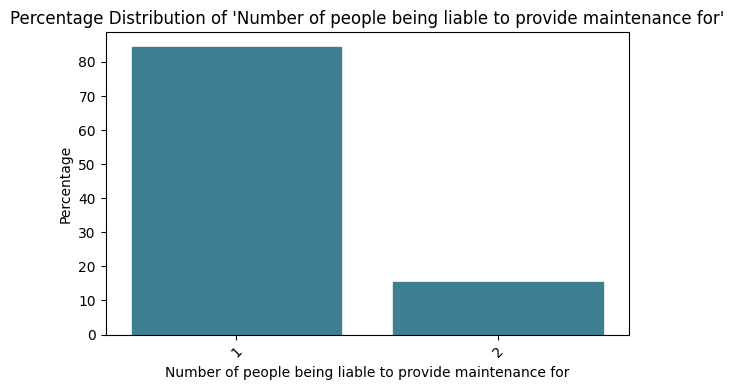

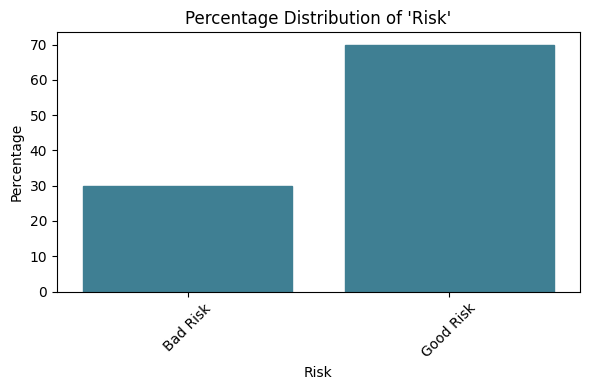

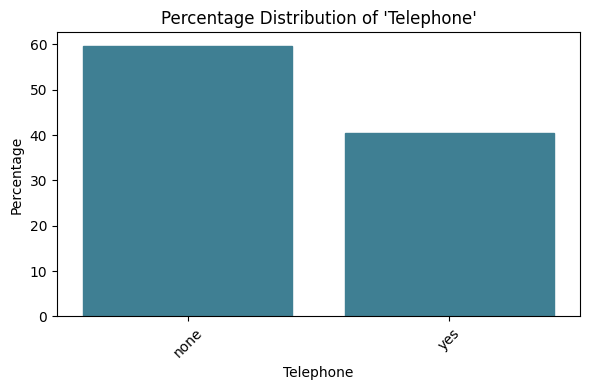

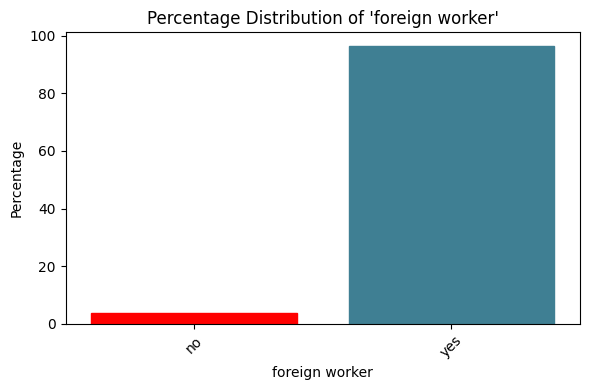

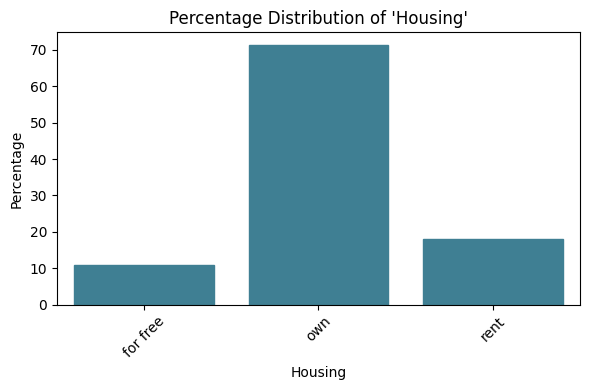

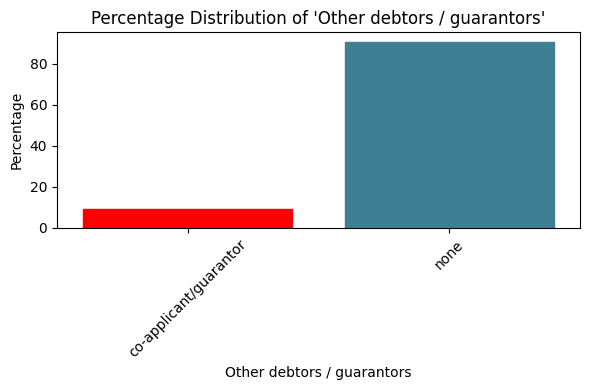

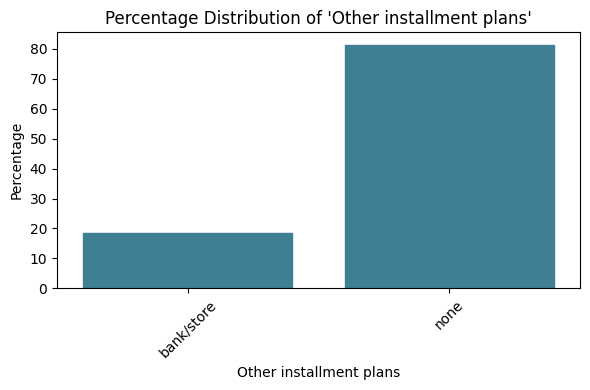

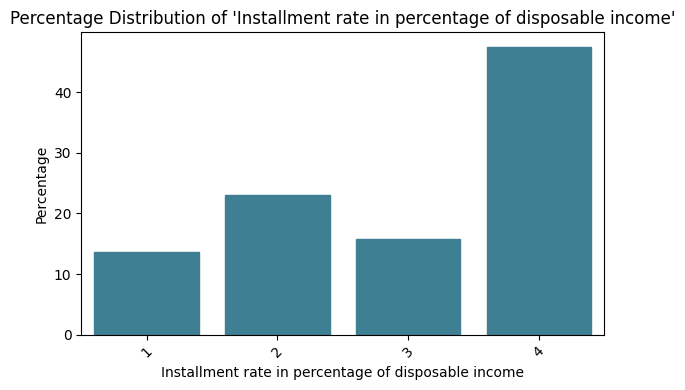

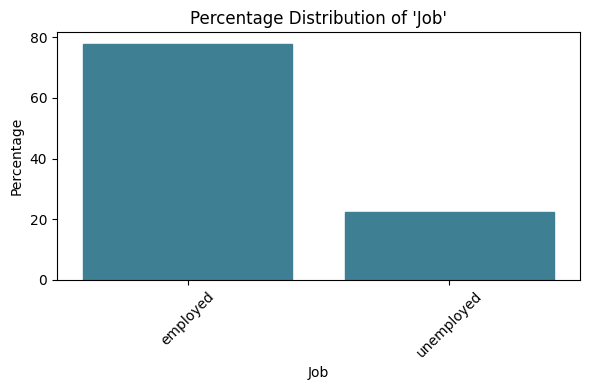

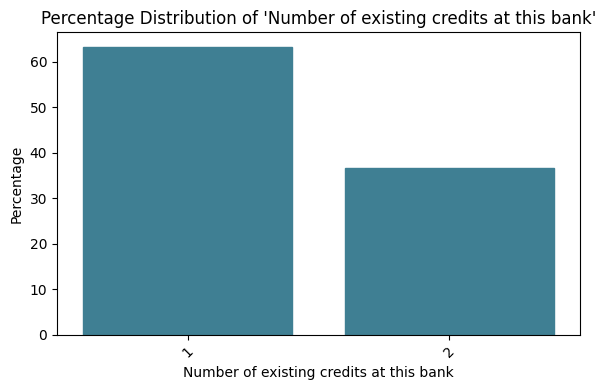

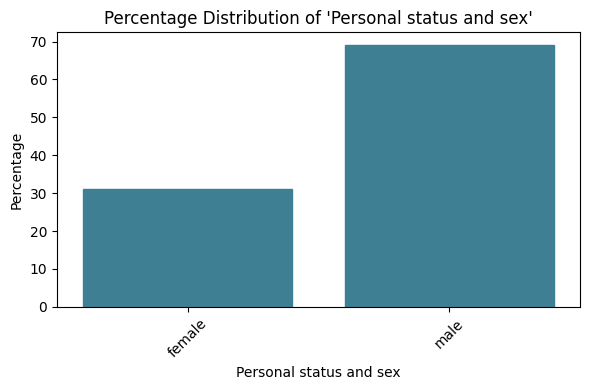

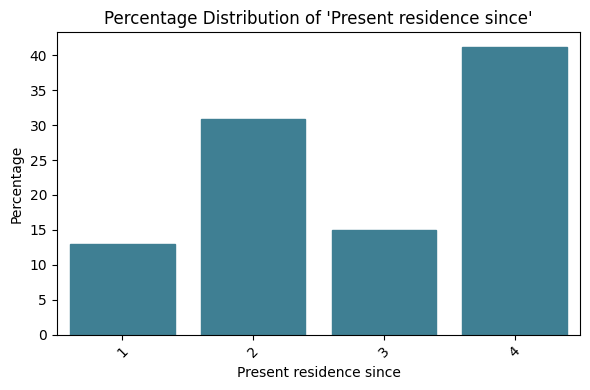

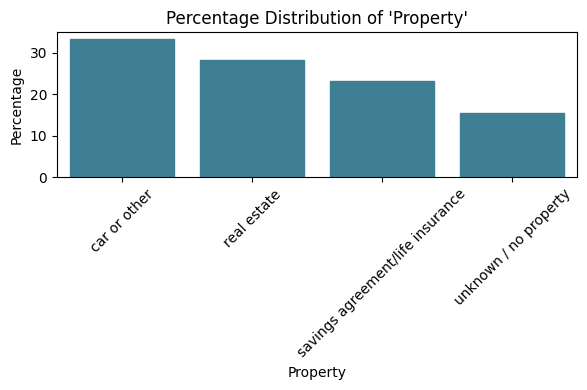

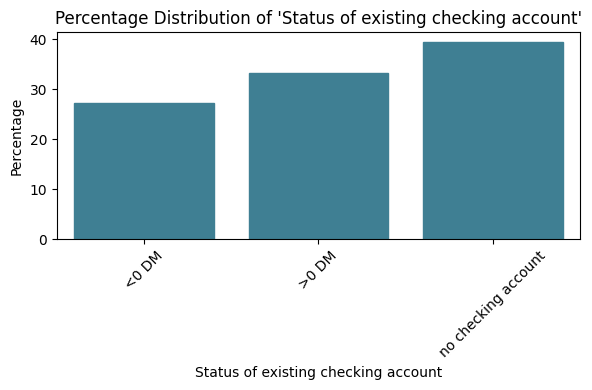

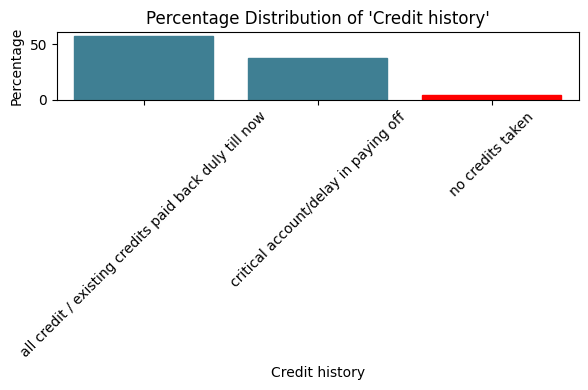

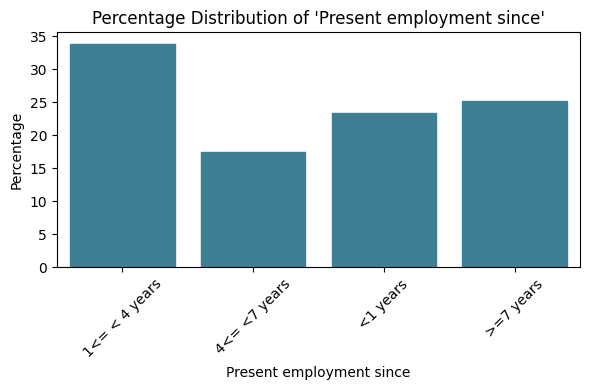

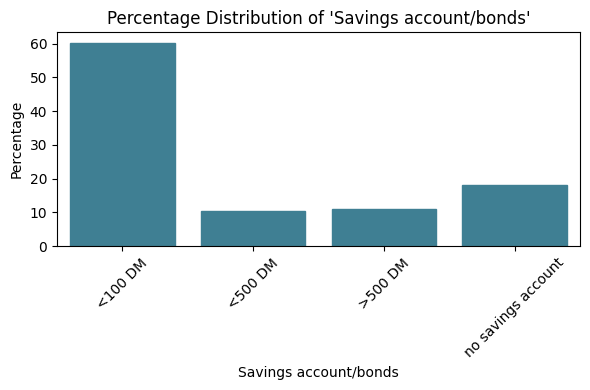

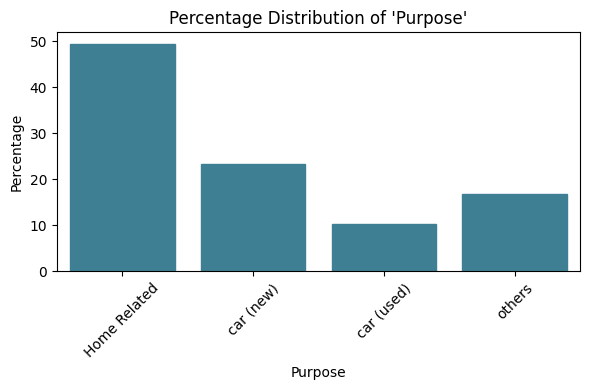

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Datapoints belonging to the categories having less than 10% are plotted in red
for key, columns in marginal_report_cluster.items():
    for col_name in sorted(columns):
        percentage_data = pd.crosstab(df[col_name], columns=["Percentage"]).apply(lambda r: (round((r / r.sum()) * 100, 2)), axis=0).reset_index()
        percentage_data.columns = [col_name, "Percentage"]

        # Visualize the percentage distribution with red for <10% and green for >=10%
        plt.figure(figsize=(6, 4))
        barplot = sns.barplot(x=col_name, y="Percentage", data=percentage_data)

        # Color bars based on the percentage values
        for bar, percent in zip(barplot.patches, percentage_data["Percentage"]):
            if percent < 10:
                bar.set_color('red')  # Below 10% in red
            else:
                bar.set_color('#3f7f93')  # 10% or above in green

        plt.title(f"Percentage Distribution of '{col_name}'")
        plt.xlabel(col_name)
        plt.ylabel("Percentage")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


### <a name="numerical-variable-stats">Numerical Variable</a>

Data consists of only 3 numerical features

In [ ]:
df[["Credit amount","Age in years","Duration in month"]].describe()

,Credit amount,Age in years,Duration in month
count,999.000000,999.000000,999.000000
mean,3273.362362,35.514515,20.917918
std,2823.365811,11.337487,12.055619
min,250.000000,19.000000,4.000000
25%,1368.500000,27.000000,12.000000
50%,2320.000000,33.000000,18.000000
75%,3972.500000,42.000000,24.000000
max,18424.000000,75.000000,72.000000


## <a name="eda">Exploratory Data Analysis (EDA)</a>

### <a name="categorical-eda">Categorical Variable</a>

We are visualizing the data for Good Risk and Bad Risk with respect to each category for all features



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

palette1 = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]
palette2 = ["#ff6b6b", "#ff7e67", "#ff8f56", "#ff9f56", "#ffa94d", "#ffb037", "#ffb037", "#ffcc2f"]

def choose_random_colors():
    return {
        "Good Risk": random.choice(palette1),
        "Bad Risk": random.choice(palette2)
    }
def visualize_distribution(attr):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=attr, hue="Risk", data=df, palette=choose_random_colors())
    ax.set_title(f"Distribution of '{attr}' for Risk Categories")
    ax.set_xlabel(attr)
    ax.set_ylabel("Count")
    plt.legend(title="Risk")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### Status of existing checking account
In credit assessment, typical interpretations might be:

"0 DM" as no balance in the checking account.

">0 DM" as a positive balance.

"<0 DM" as an overdraft or negative balance, which might signal financial instability or higher risk.

Here DM refers to Debit Memo
According to the visualization, having 0 or more DM represents a better credit score than having <0 DM

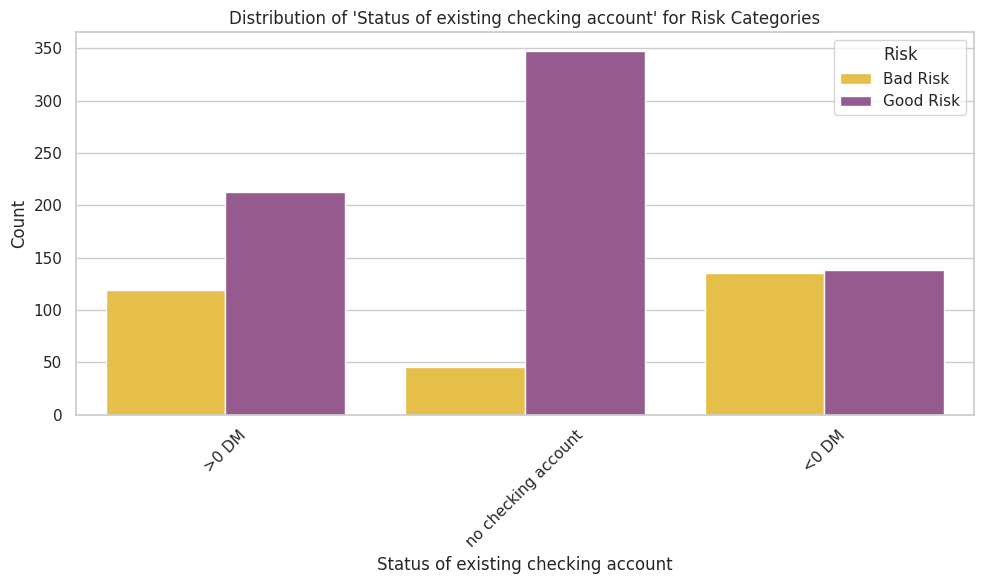

In [ ]:
visualize_distribution("Status of existing checking account")

#### Credit history
In credit assessment, a delay in paying credits, despite being a negative factor, might be perceived as relatively better than having no credit history at all for a few reasons:

Establishing Creditworthiness:

Delayed Payments: It indicates some credit activity and a track record, even if not perfect. It shows a willingness to repay, though not always on time.

No Credits Taken: Having no credit history might make it challenging for lenders to assess an individual's creditworthiness or reliability.

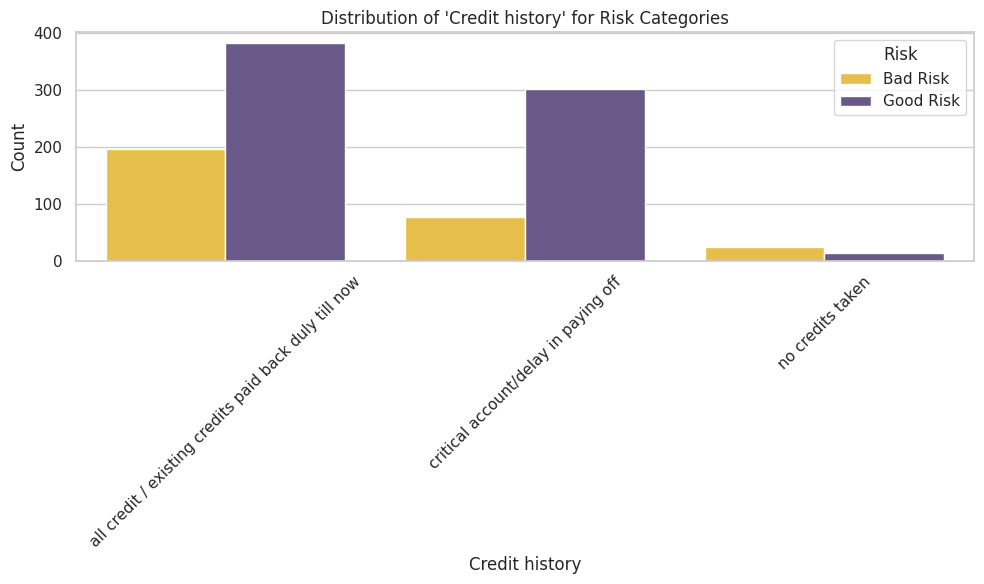

In [ ]:
visualize_distribution("Credit history")

#### Purpose
According to visualzation, there is less risk to provide loan if the purpose is buying property. This can be because:

Property purchase signifies stability and a long-term financial commitment, enhancing creditworthiness.

Owning property builds equity, showcases financial planning, and provides collateral for favorable lending terms.

Property ownership diversifies credit types, contributing to a positive credit mix and profile.


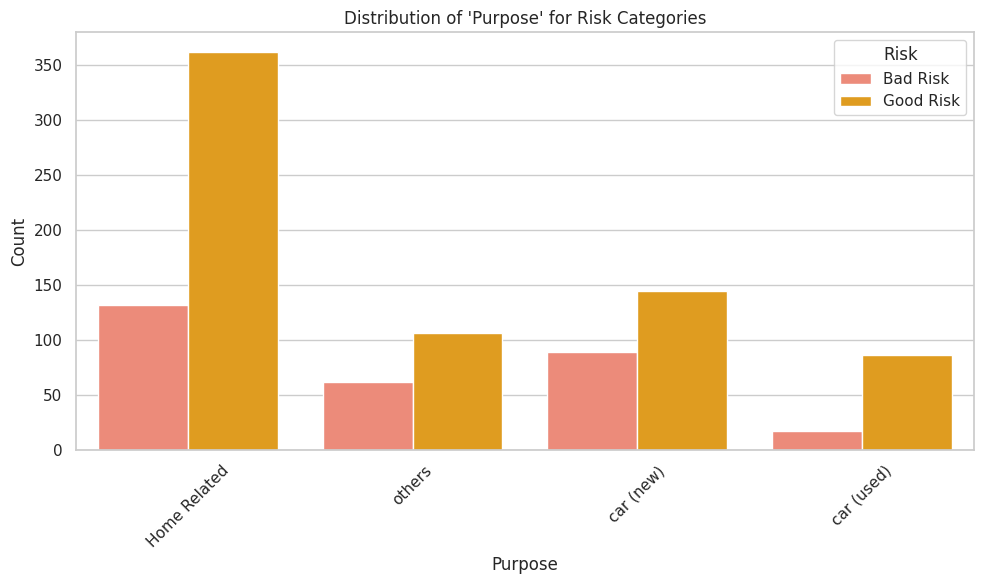

In [ ]:
visualize_distribution("Purpose")

#### Savings account/bonds
Savings account/bonds might indirectly influence credit scores positively, showcasing financial stability and potential capacity for loan repayment. However, it's not a direct determinant, and credit scores primarily reflect credit-related behavior rather than savings.

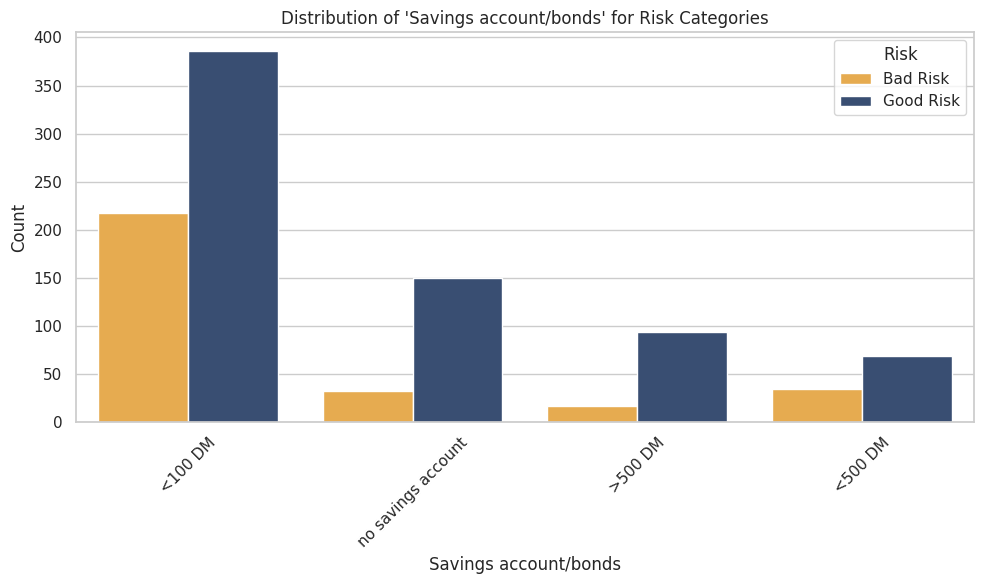

In [ ]:
visualize_distribution("Savings account/bonds")

#### Present employment since

The duration of present employment, particularly between 0 to 10 years, can indirectly impact credit scores, showing stability and steady income

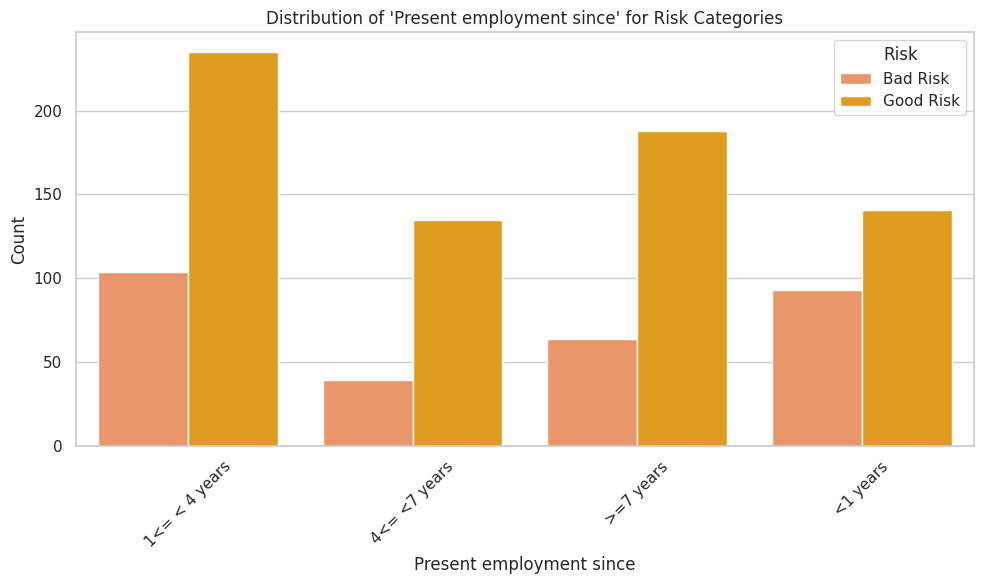

In [ ]:
visualize_distribution("Present employment since")

#### Installment rate in percentage of disposable income

The installment rate in relation to disposable income can significantly influence credit scores, with higher rates potentially impacting scores negatively due to increased risk of financial strain and missed payments. Lower rates suggest a manageable debt burden, potentially positively impacting credit scores and reflecting better financial stability.

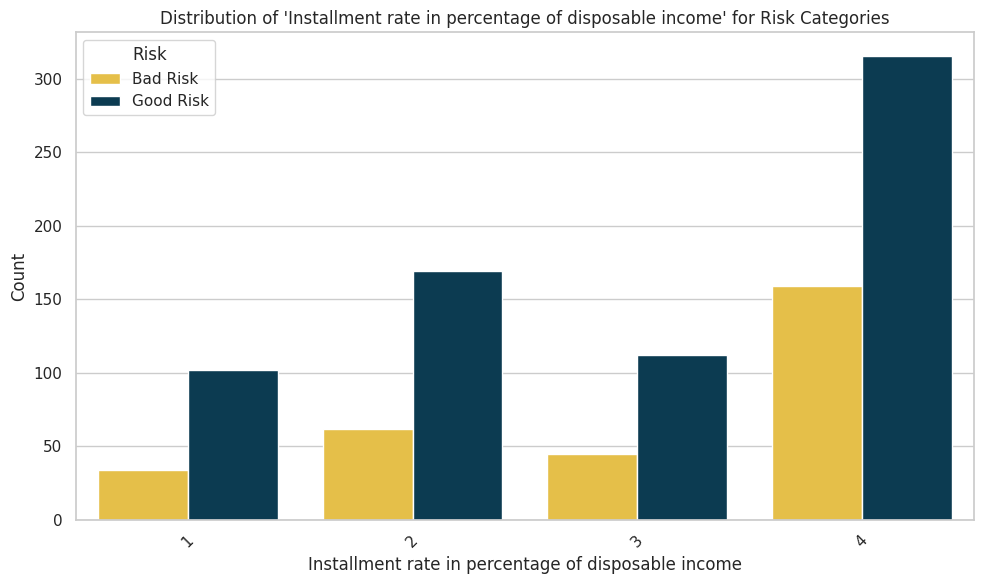

In [ ]:
visualize_distribution("Installment rate in percentage of disposable income")

#### Personal status and sex

Personal status and sex might have limited direct impact on credit scores as credit scoring primarily focuses on credit-related behavior like payment history and credit utilization. However, certain factors related to personal status, such as stability in relationships or financial responsibilities, might indirectly influence creditworthiness and, consequently, credit scores. Gender itself isn't a direct factor in credit scoring, as credit scores are based on financial behaviors rather than gender identity.

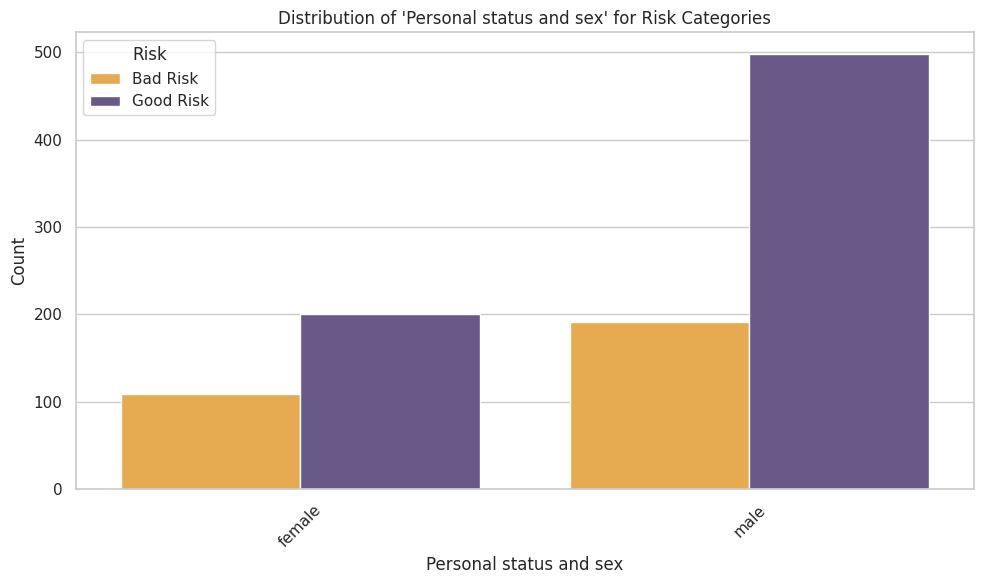

In [ ]:
visualize_distribution("Personal status and sex")

#### Other debtors / guarantors
The presence of other debtors or guarantors might impact credit risk, potentially mitigating it by sharing liability or exacerbating it if additional debtors pose a higher risk. Having a guarantor might positively influence risk assessment by providing assurance for loan repayment.
According to the visualization, having one is better than not having one

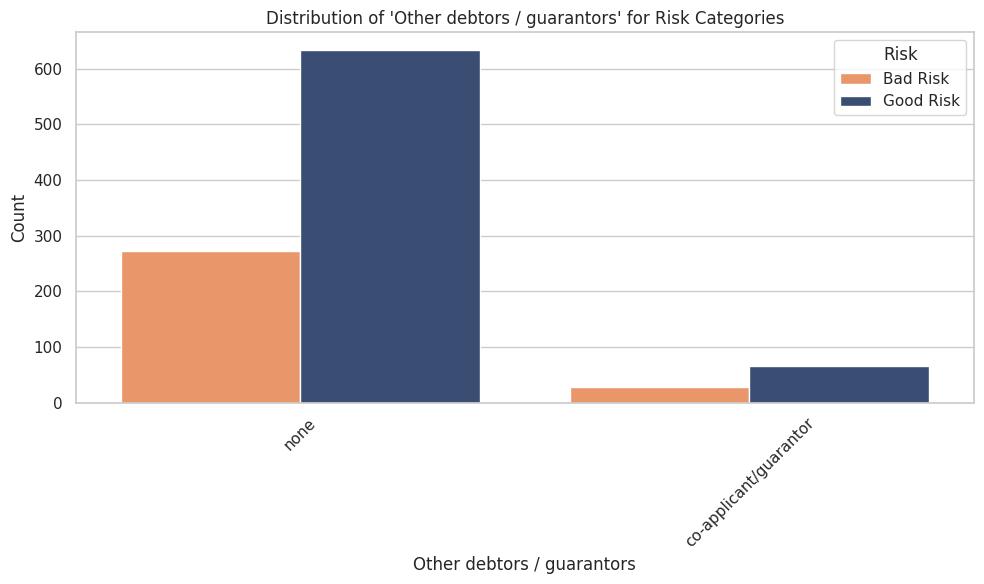

In [ ]:
visualize_distribution("Other debtors / guarantors")

#### Present residence since
Individuals with longer residence durations within the 0-5 years range might showcase stability, potentially positively impacting credit risk assessment. Longer residence duration often signals a settled lifestyle, contributing to a perception of reliability and stability, which can influence credit risk evaluation favorably.

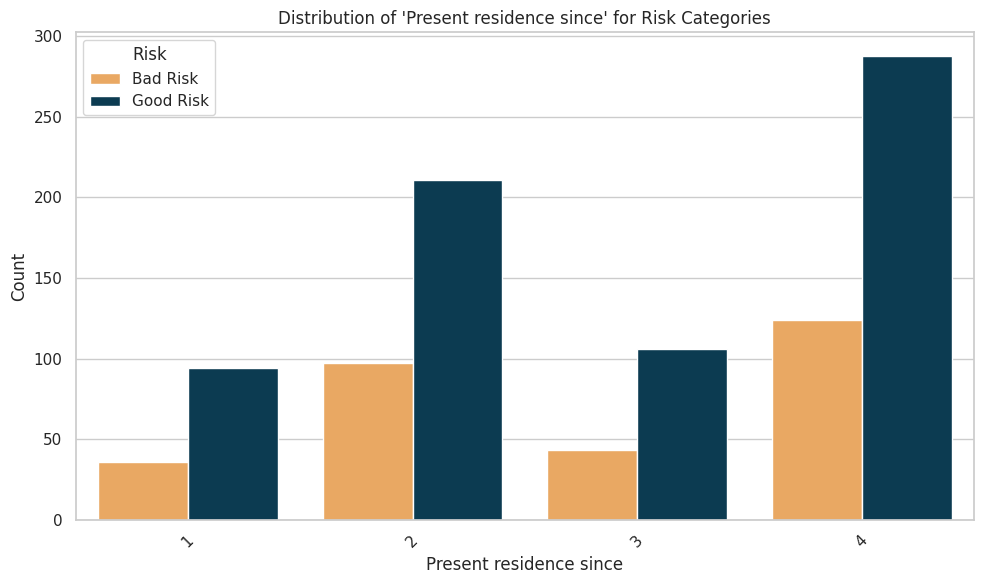

In [ ]:
visualize_distribution("Present residence since")

#### Property
Borrower's property
The borrower's property, such as real estate or assets used as collateral, can significantly impact credit risk assessment. Property ownership often provides security for lenders, potentially reducing risk perception and leading to more favorable terms or increased loan approval likelihood. Additionally, property ownership might signify stability and financial strength, positively influencing credit risk assessment.
Hence, according it visualization, it is very risky to provide loan to one with no or unknown property

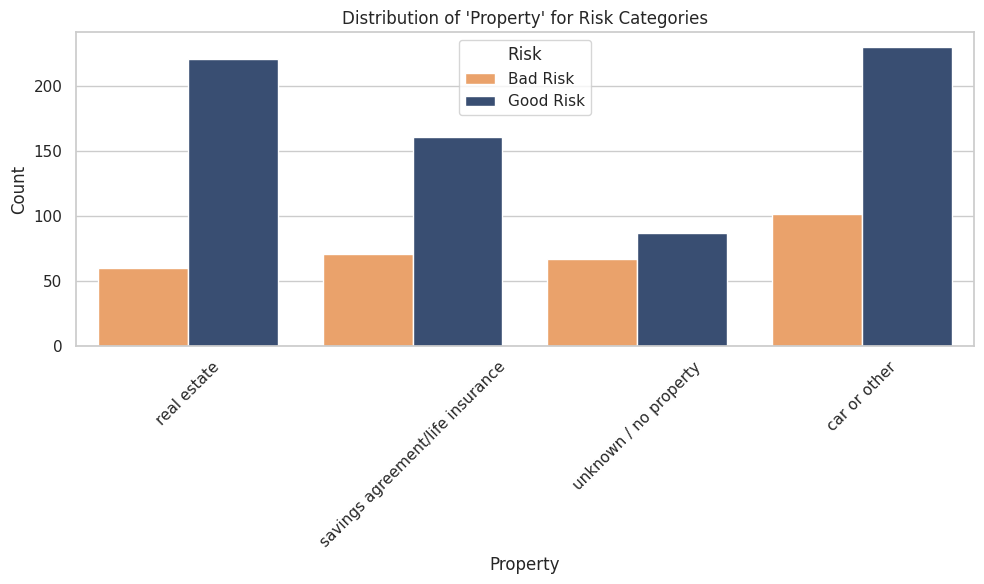

In [ ]:
visualize_distribution("Property")

#### Other installment plans
The presence of other installment plans, especially those tied to reputable institutions like banks or stores, might impact credit risk assessment positively. Such plans usually involve structured repayments, potentially reflecting responsible credit behavior and positively influencing risk evaluation

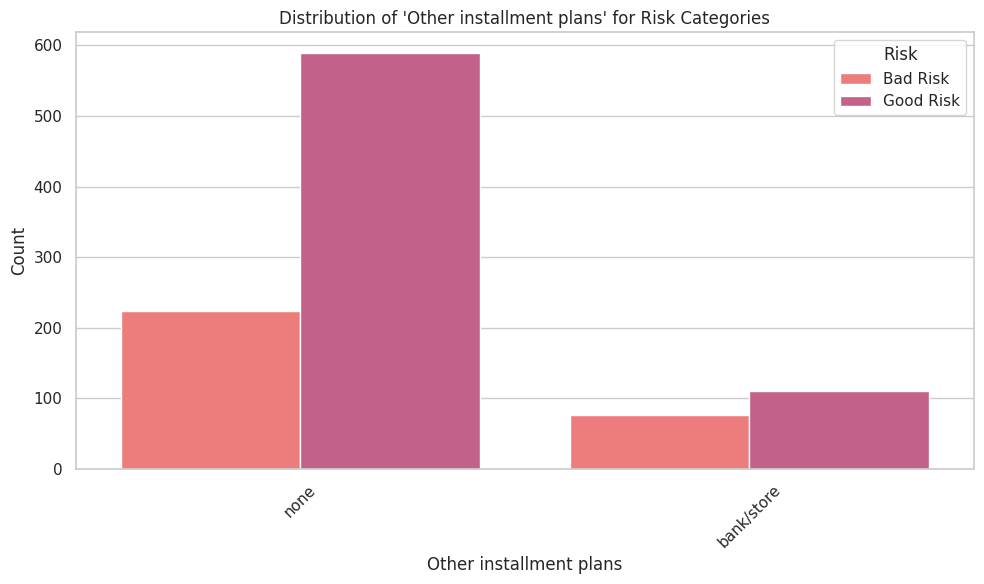

In [ ]:
visualize_distribution("Other installment plans")

#### Housing

Different housing statuses—owning, living rent-free, or renting—can influence credit risk assessment:

Property Ownership (Own/Free): Owning property or living rent-free might positively impact credit risk evaluation, showcasing stability, responsibility, and financial strength.

Renting: While renting doesn't inherently impact credit risk negatively, it might provide fewer assurances compared to property ownership, potentially influencing risk assessment neutrally

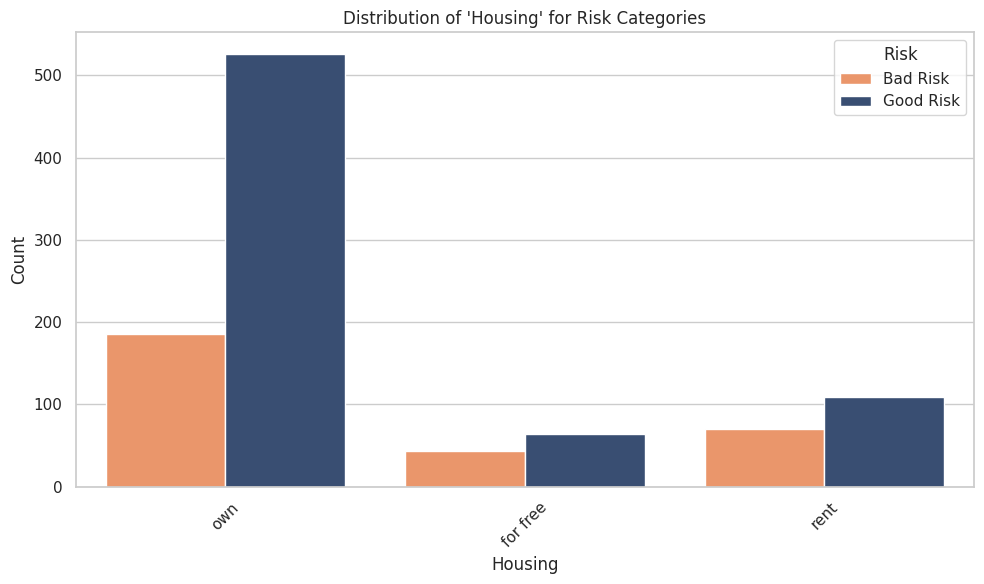

In [ ]:
visualize_distribution("Housing")

#### Number of existing credits at this bank

The number of existing credits at a bank can influence credit risk assessment:

Higher Number of Credits: A higher count might suggest a higher debt load, potentially impacting credit risk negatively by signaling an increased risk of overextension or difficulty in managing multiple obligations.

Lower Number of Credits: Fewer credits might imply a lower debt load, potentially positively influencing credit risk assessment by indicating manageable financial commitments.

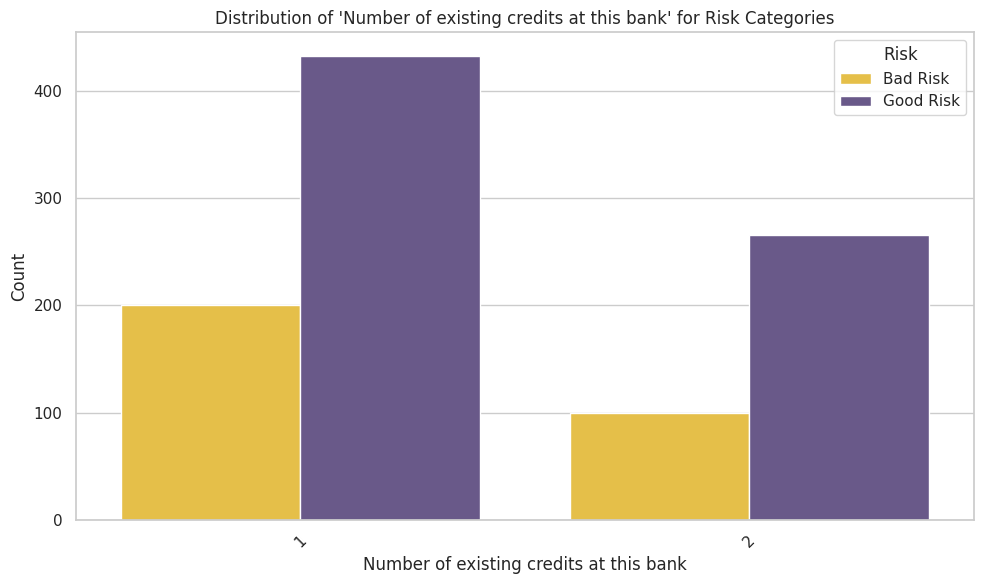

In [ ]:
visualize_distribution("Number of existing credits at this bank")

#### Number of people being liable to provide maintenance for

The number of people liable for maintenance obligations doesn't typically have a direct impact on credit risk assessment. This information generally isn't considered in traditional credit scoring models, which primarily focus on credit-related behaviors like payment history, credit utilization, and debt-to-income ratio. Instead, credit risk assessment tends to concentrate on an individual's financial behaviors and obligations directly tied to credit and loan repayments.


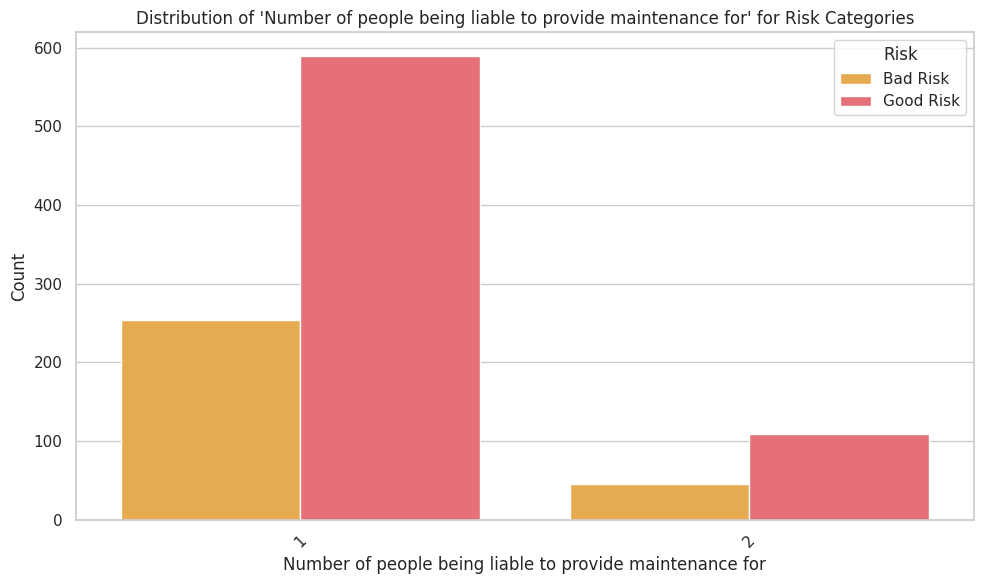

In [ ]:
visualize_distribution("Number of people being liable to provide maintenance for")

#### Foreign worker

Foreign worker status may have a limited direct impact on credit risk assessment. Credit risk is typically evaluated based on financial behaviors, credit history, and other relevant factors rather than employment status or nationality.


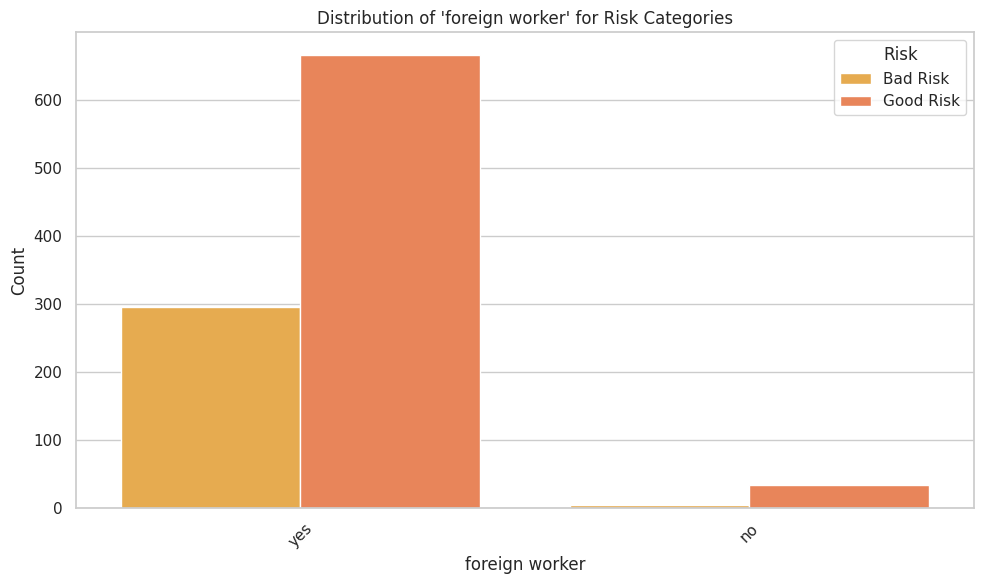

In [ ]:
visualize_distribution("foreign worker")

#### Duration in Month

The duration in months might indirectly impact credit scores:

Longer Credit Duration: Maintaining credit accounts for longer durations can positively influence credit scores, showcasing a longer credit history and potentially demonstrating responsible credit management.

Shorter Credit Duration: Limited credit history due to a shorter duration might have a neutral impact or a slightly negative effect on credit scores, as it provides fewer data points for assessing creditworthiness.

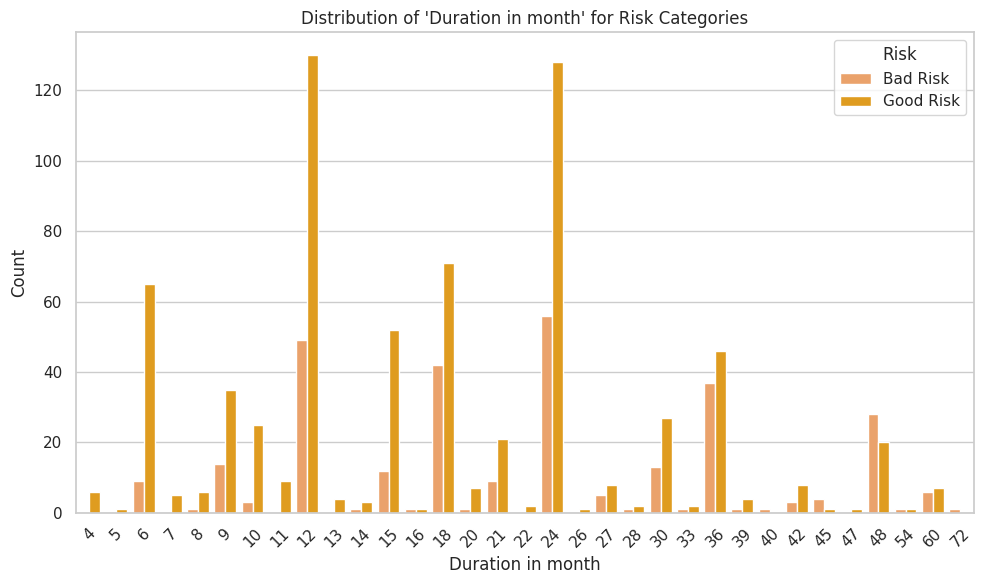

In [ ]:
visualize_distribution("Duration in month")

#### Age category
We are converting age to a categorical variable based on range, for better visualization

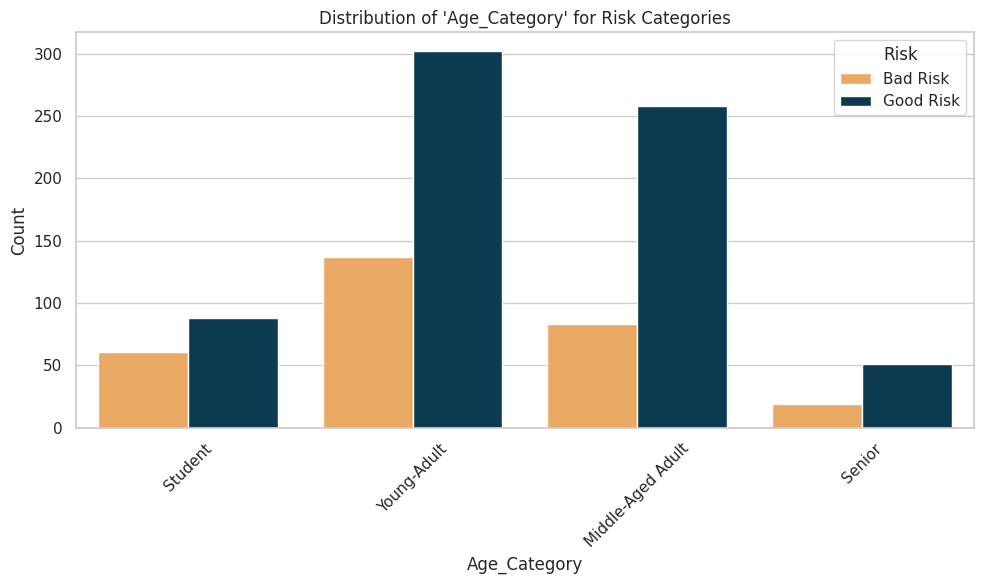

In [ ]:
age_interval = [18, 24, 35, 55, 120]
age_category = ['Student', 'Young-Adult', 'Middle-Aged Adult', 'Senior']
df["Age_Category"] = pd.cut(df["Age in years"], age_interval, labels=age_category)
visualize_distribution("Age_Category")

### <a name="numerical-eda">Numerical Variables</a>

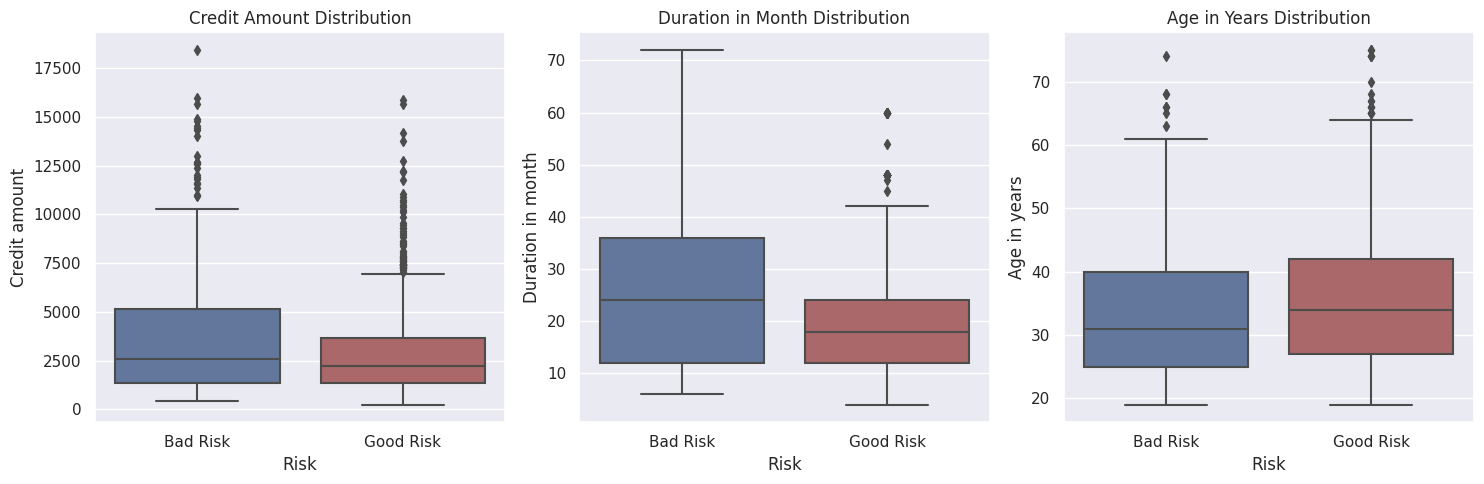

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

#Visualizing numerical features
f, axes = plt.subplots(1, 3, figsize=(15, 5))

# Box plot for Credit amount
sns.boxplot(y=df["Credit amount"], x=df["Risk"], orient='v', ax=axes[0], palette=["#5975A4", "#B55D60"])
axes[0].set_title("Credit Amount Distribution")

# Box plot for Duration in month
sns.boxplot(y=df["Duration in month"], x=df["Risk"], ax=axes[1], palette=["#5975A4", "#B55D60"])
axes[1].set_title("Duration in Month Distribution")

# Box plot for Age in years
sns.boxplot(y=df["Age in years"], x=df["Risk"], orient='v', ax=axes[2], palette=["#5975A4", "#B55D60"])
axes[2].set_title("Age in Years Distribution")

plt.tight_layout()
plt.show()

### <a name="feature-selection">Feature Selection</a>


##Data Attribute Refinement using P-values

In our effort to improve modelling, we have employed statistical analysis through the use of p-values. By conducting hypothesis tests, we aim to identify features that significantly contribute to the predictive model.

P-values indicate the probability of obtaining the observed results (or more extreme) under the assumption that the null hypothesis is true. A low p-value (typically less than 0.05) suggests that the observed relationship between the predictor and the response is statistically significant.

The criteria for feature selection involve assessing p-values, and features with p-values less than 0.05 are considered statistically significant. Consequently, features failing to meet this threshold are selectively dropped from the dataset. This meticulous approach ensures that the remaining features hold higher statistical relevance, contributing meaningfully to the overall predictive accuracy of our model.

In [ ]:
#p-values less than 0.05 are marked red, and will be dropped
def style_stats_specific_cell(x):

    color_thresh = 'background-color: lightpink'

    df_color = pd.DataFrame('', index=x.index, columns=x.columns)
    rows_number=len(x.index)
    for r in range(0,rows_number):
        try:
            val=(x.iloc[r, 1])
            if val>0.05:
                df_color.iloc[r, 1]=color_thresh
        except:
            pass
    return df_color

In [ ]:
def calculate_categorical_significance(df, column_names):
    statistical_significance = []
    for attr in column_names:
        data_count = pd.crosstab(df[attr], df["Risk"]).reset_index()
        obs = np.asarray(data_count[["Bad Risk", "Good Risk"]])
        chi2, p, dof, expected = stats.chi2_contingency(obs)
        statistical_significance.append([attr, round(p, 6)])

    statistical_significance = pd.DataFrame(statistical_significance, columns=["Attribute", "P-value"])
    return statistical_significance

def calculate_continuous_significance(df, column_names):
    statistical_significance = []
    good_risk_df = df[df["Risk"] == "Good Risk"]
    bad_risk_df = df[df["Risk"] == "Bad Risk"]

    for attr in column_names:
        statistic, p = stats.f_oneway(good_risk_df[attr].values, bad_risk_df[attr].values)
        statistical_significance.append([attr, round(p, 6)])

    statistical_significance = pd.DataFrame(statistical_significance, columns=["Attribute", "P-value"])
    return statistical_significance

# Usage:
column_names_cat_stats = ["Status of existing checking account", "Credit history", "Purpose",
                          "Savings account/bonds", "Present employment since",
                          "Installment rate in percentage of disposable income", "Personal status and sex",
                          "Other debtors / guarantors", "Present residence since", "Property",
                          "Other installment plans", "Housing", "Number of existing credits at this bank",
                          "Job", "Number of people being liable to provide maintenance for", "Telephone",
                          "foreign worker"]

categorical_significance = calculate_categorical_significance(df, column_names_cat_stats)
display(categorical_significance.style.apply(style_stats_specific_cell, axis=None))

column_names_cont_stats = ["Credit amount", "Age in years", "Duration in month"]
continuous_significance = calculate_continuous_significance(df, column_names_cont_stats)
display(continuous_significance.style.apply(style_stats_specific_cell, axis=None))

,Attribute,P-value
0,Status of existing checking account,0.000000
1,Credit history,0.000000
2,Purpose,0.000052
3,Savings account/bonds,0.000000
4,Present employment since,0.000450
5,Installment rate in percentage of disposable income,0.134102
6,Personal status and sex,0.021524
7,Other debtors / guarantors,1.000000
8,Present residence since,0.861344
9,Property,0.000032


,Attribute,P-value
0,Credit amount,0.000001
1,Age in years,0.004559
2,Duration in month,0.000000


<a name="selected-feature">Selected Features after computing p-values</a>: Status of existing checking account, Credit history, Purpose,Savings account/bonds, Present employment since, Personal status and sex, Property, Other installment plans, Housing, foreign worker, Credit amount, Age in years, Duration in month

In [ ]:
attr_significant=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Personal status and sex","Property","Other installment plans","Housing","foreign worker",\
"Credit amount","Age in years","Duration in month"]
target_variable=["Risk"]
df=df[attr_significant+target_variable]

## Correlation Matrix

<ipython-input-34-39e6a4b74d78>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_matrix = df.corr()


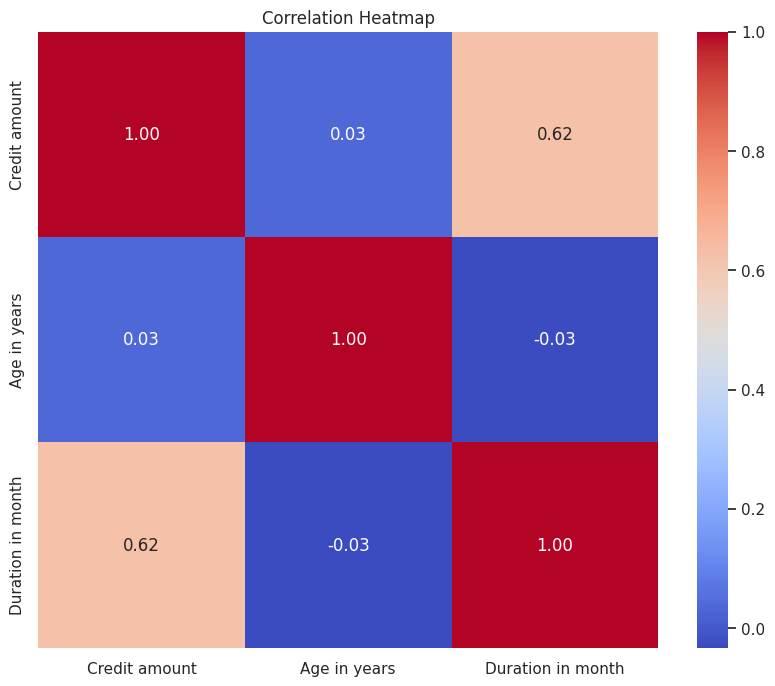

In [ ]:
cov_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

 Given the high corelation observed between the "Credit amount" and "Duration in month" features in the covariance matrix of the numerical features, we have decided to address multicollinearity by introducing a new feature named "Credit Per Month." This new feature represents the ratio of the credit amount to the duration in months. Consequently, to mitigate redundancy and enhance the model's interpretability, we are removing both the "Credit amount" and "Duration in month" features from the dataset.

In [ ]:
# Adding a new column "Credit per Month"
df["Credit per Month"] = df["Credit amount"] / df["Duration in month"]
df.drop(["Credit amount", "Duration in month"], axis=1, inplace=True)

<a name="data-pre">__Using One Hot encoding to represent categorical features for better modelling__</a>

In [ ]:
col_cat_names = [
    "Status of existing checking account", "Credit history", "Purpose",
    "Savings account/bonds", "Present employment since",
    "Personal status and sex", "Property", "Other installment plans",
    "Housing", "foreign worker"
]

# One-hot encode categorical features and merge with the original DataFrame
df = pd.get_dummies(df, columns=col_cat_names, prefix=col_cat_names)

# Convert the target variable into numeric
risk_mapping = {"Good Risk": 1, "Bad Risk": 0}
df["Risk"] = df["Risk"].map(risk_mapping)

In [ ]:
#view of the dataset after preprocessing
df.head()

,Age in years,Risk,Credit per Month,Status of existing checking account_<0 DM,Status of existing checking account_>0 DM,Status of existing checking account_no checking account,Credit history_all credit / existing credits paid back duly till now,Credit history_critical account/delay in paying off,Credit history_no credits taken,Purpose_Home Related,Purpose_car (new),Purpose_car (used),Purpose_others,Savings account/bonds_<100 DM,Savings account/bonds_<500 DM,Savings account/bonds_>500 DM,Savings account/bonds_no savings account,Present employment since_1<= < 4 years,Present employment since_4<= <7 years,Present employment since_<1 years,Present employment since_>=7 years,Personal status and sex_female,Personal status and sex_male,Property_car or other,Property_real estate,Property_savings agreement/life insurance,Property_unknown / no property,Other installment plans_bank/store,Other installment plans_none,Housing_for free,Housing_own,Housing_rent,foreign worker_no,foreign worker_yes
0,22,0,123.979167,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1
1,49,1,174.666667,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
2,45,1,187.666667,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1
3,53,0,202.916667,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1
4,35,1,251.527778,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1


### <a name="model">Modelling</a>

### <a name="train-test">Train/Test Split </a>

In [ ]:
def stratified_train_test_split(X, y, split_ratio=0.7, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)

    class_indices = {}

    for class_label in np.unique(y):
        class_indices[class_label] = np.where(y == class_label)[0]

    train_indices = []
    test_indices = []

    # Performing stratified sampling
    for class_label, indices in class_indices.items():
        np.random.shuffle(indices)
        split_idx = int(len(indices) * split_ratio)
        train_indices.extend(indices[:split_idx])
        test_indices.extend(indices[split_idx:])

    # Spliting the data into training and test sets
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

In [ ]:
X = df.drop('Risk', 1).values #independent variables
y = df["Risk"].values #target variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=0)
df1=df.copy()

<ipython-input-39-4ffe5fd68011>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('Risk', 1).values #independent variables


# (Model 1) Perceptron


The learning process of a perceptron involves iteratively updating its weights and bias to minimize classification errors. During each epoch of training, the perceptron processes each training sample, computing a linear output by taking the dot product of the input features with the weights and adding the bias. The predicted class is determined using a binary step function, assigning 1 if the linear output is greater than or equal to zero and 0 otherwise. The perceptron then adjusts its weights and bias based on the difference between the predicted class and the true class, multiplied by the learning rate. This adjustment process continues for a specified number of iterations. The learning rate influences the size of weight and bias updates, impacting the convergence speed and stability of the learning process. The perceptron aims to find a decision boundary, a hyperplane in the input space, that separates different classes, and through this iterative learning process, it adapts to the underlying patterns in the training data.



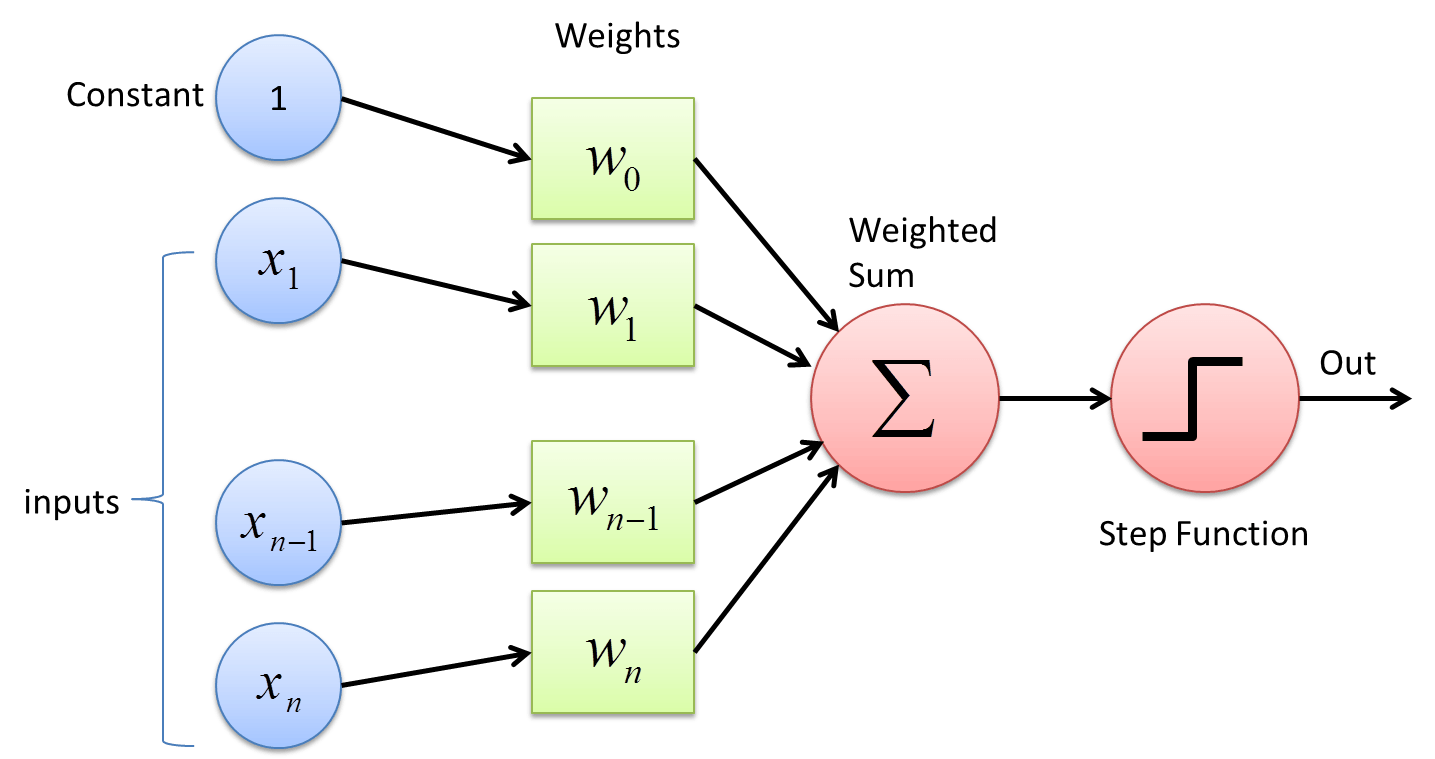




The process can be described as:

1. Linear Output Calculation:

$$linear\_output = \sum_{i = 1}^{n} weights[i] * input[i] + bias$$

2. Activation Function (Binary Step):

$$y\_pred = \begin{cases}
1, & \text{if } \text{linear_output} \geq 0 \\
0, & \text{otherwise}
\end{cases}$$

3. Weight Update:

$$update = learning\_rate * (true\_class - y\_pred)$$


$$weights[i]\ += update\ *\ input[i]\   for\ each\ i $$

4. Bias Update:

$$bias += update$$



In [ ]:
class Perceptron:
    #constructor to initialize variables
    def __init__(self, lr=0.01, n_iters=10000):
        # Initializing the learning rate and number of iterations
        self.lr = lr  # Learning rate: determines the step size in updating weights
        self.n_iters = n_iters  # Number of iterations: epochs for training the model
        self.weights = None  # Weights: parameters for each feature
        self.bias = None  # Bias or threshold for the model

    #function to fit perceptron on training data
    def fit(self, X, y):
        # Initializing weights and bias to zeros
        # Get the number of samples and features
        n_samples, n_features = X.shape
        # Initializing weights as zeros
        self.weights = np.zeros(n_features)
        # Initializing bias as zero
        self.bias = 0

        # Training the model for n_iter epochs
        for _ in range(self.n_iters):  # Looping through the specified number of iterations
            # Iterating over all samples and update the weights and bias
            for idx, x_i in enumerate(X):  # Iterate through each sample and its index
                # Calculating the linear output
                # output is weighted sum + bias
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Predicting the classes based on the linear output
                y_pred = 1 if linear_output >= 0 else 0
                # Calculating the updated value based on the prediction and actual class
                update = self.lr * (y[idx] - y_pred)

                # Updating weights: Adjusting the weights based on the update value and input
                self.weights += update * x_i

                # Updating bias: Adjusting the bias based on the update value
                self.bias += update

    #function to predict the classes
    def predict(self, X):
        # Calculating the linear output and return the predicted class
        linear_output = np.dot(X, self.weights) + self.bias
        # Converting the linear output to predicted classes (0 or 1)
        y_pred = np.where(linear_output >= 0, 1, 0)
        return y_pred


In [ ]:
#creating the model
model = Perceptron(lr=0.001, n_iters=2500)
#fitting the model
model.fit(X_train, y_train)
#finding predictions
predictions = model.predict(X_test)
#calculating the accuracy
accuracy = accuracy_score(y_test, predictions)
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 74.00%


#(Model 2)Naive Bayes


The Naive Bayes model leverages the assumption of class conditioned independence in order to utilise the theory of Bayes Theorem in predicting the class of a sample, given its underlying distribution and prior probabilities. The posterier probability of a sample belonging to a given class k is given by:

$$P(C_k | x) = \frac{P(x | C_k) \cdot P(C_k)}{P(x)}$$

Bayes theorem is applicable for the implementation of this model because it assumes that the distribution of the input variables are independent of each other conditionally. Under this assumption, the solution using the maximum likelihood function indicates that the training data can be fitted using the labelled data for all individual classes. Keeping in mind the continuous nature of variables present in the dataset, I have implemented the Gaussian Naive Bayes model for solving the problem at hand.

$$ f(x | \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} \cdot e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

Our attribute feature space is 20 dimensionsal, making Naive Bayes model a wise choice for the classification task because of its high efficiency pertaining to high dimensional inputs. The percentage error associated with the classification can be treated as indicator of a certain degree of correlation among the features.

In [ ]:
# Importing necessary libraries
import numpy as np
from collections import defaultdict
from scipy.stats import norm
from sklearn.metrics import accuracy_score

# Defining a class for our Naive Bayes model
class NaiveBayesClassifier:
    def __init__(self):
        self.class_probs = defaultdict(float)
        self.class_means = defaultdict(list)
        self.class_stds = defaultdict(list)


# This function is utilised to train the data by calculating the associated means and deviations.
    def fit(self, X, y):
        unique_classes = np.unique(y)

        for c in unique_classes:
            class_instances = X[y == c]
            self.class_probs[c] = len(class_instances) / len(X)
            self.class_means[c] = np.mean(class_instances, axis=0)
            self.class_stds[c] = np.std(class_instances, axis=0)


# The maximum likelihood function associated with the Gaussian probability density is calculated using this function.

    def calculate_likelihood(self, x, mean, std):
        exponent = np.exp(-((x - mean) ** 2) / (2 * (std ** 2)))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent


# The prediction is made for a single instance of the samples.

    def predict_instance(self, x):
        likelihoods = {}

        for c in self.class_probs:
            class_prob = np.log(self.class_probs[c])
            class_likelihood = np.sum(np.log(self.calculate_likelihood(x, self.class_means[c], self.class_stds[c])))
            likelihoods[c] = class_prob + class_likelihood

        return max(likelihoods, key=likelihoods.get)

# The consolidated prediction for the complete dataset is made by calling predict_instance for all samples and appending to the predictions array.

    def predict(self, X):
        predictions = []

        for instance in X:
            predictions.append(self.predict_instance(instance))

        return predictions

In [ ]:
# This code block instantiates nb_classifier with the Naive Bayes Classifier class and performs subsequent model fitting and predictions.
nb_classifier = NaiveBayesClassifier()

# The nb_classifier model employs the 'fit' function to the train the data.
nb_classifier.fit(X_train, y_train)

# Model predictions are now made to get the outcomes using the 'predict' function defined within the classifier class.
predictions = nb_classifier.predict(X_test)

# The model's utility in solving the classification task is evaluated through the 'accuracy_score' metric from the sklearn library.
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


#(Model 3)Random Forest

###Decision Tree
Although decision trees are a method of supervised learning, they are primarily employed to solve classification problems. However, they can also be used to solve regression problems. This classifier is tree-structured, with internal nodes standing in for dataset attributes, branches for decision rules, and leaf nodes for each outcome.

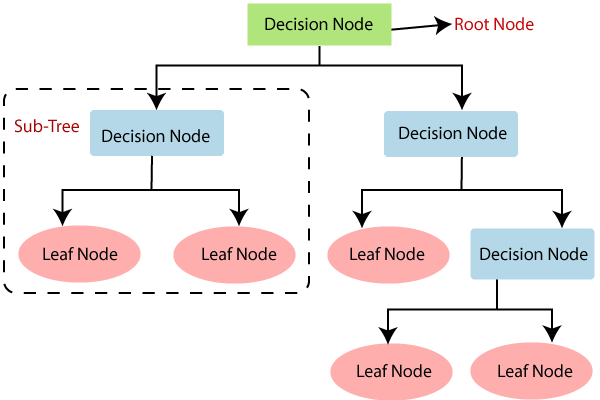


The primary problem that emerges while implementing a decision tree is figuring out which attribute is ideal for the root node and its child nodes. In order to address these issues, a method known as attribute selection measure, or ASM, has been developed. We can quickly choose the ideal attribute for the tree's nodes using this measurement. For ASM, there are two widely used methods, which are:


1. Information Gain

2. Gini Index

Here in our model we used information gain

###Information Gain
The measurement of changes in entropy following the attribute-based dataset segmentation is known as information gain.
It determines the amount of knowledge a feature gives us about a class.

Attribute with the highest information gain is split first in a decision tree algorithm, which always seeks for ways to maximize the value of information gain. It can be computed using the formula given below:

$$ Information Gain= Entropy(S)- [(Weighted Avg) *Entropy(each feature)]  $$

###Entropy
Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data. Entropy can be calculated as:

$$Entropy(s)= -P(yes)log2 P(yes)- P(no) log2 P(no)$$

Where,

S= Total number of samples

P(yes)= probability of yes

P(no)= probability of no

Decision Tree in itself is a very efficient algorithm but it is more popular for use in another ML algorithm called Random Forest.

###Random Forest
As the name suggests Random Forest is a classifier that uses multiple decision trees on different dataset subsets and averages them to increase the dataset's predictive accuracy.
Rather than depending on a single decision tree, the random forest predicts the outcome based on the majority vote of predictions from each tree.
The lagre number of trees in the forest leads to high accuracy and prevents overfitting.

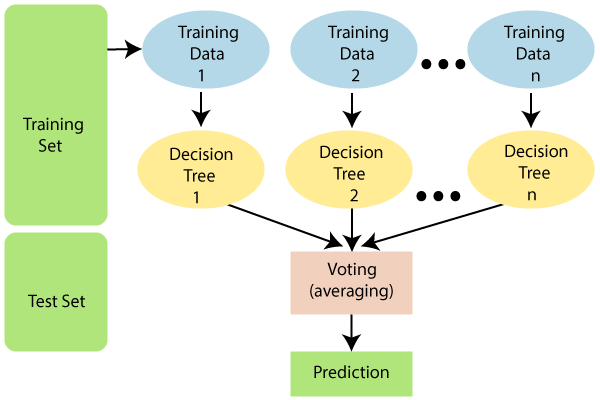

###Working of Random Forest Algorithm
The two stages of Random Forest's operation are the creation of the random forest from the combination of N decision trees and the prediction of each tree generated in the first phase.

The steps following can be used to explain the working process:

**Step 1**: From the training set, choose N data points at random.

**Step 2**: Create the decision trees linked to the chosen data points (subsets) in step two.

**Step 3**: Select the number N for the decision trees you wish to construct.

**Step 4**: Carry out Steps 1 and 2.

**Step 5**: Locate the predictions made by every decision tree for the new data points, then allocate them to the group receiving the majority of votes.






In [ ]:
#importing numpy for working with arrays
#importing pandas for data wrangling and data manipulation purposes
#importing train_test_split to split the data in training and testing sets
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split

#setting random seed
np.random.seed(100)

 # Load data from a CSV file using pandas
data = pd.read_csv('german_data_credit_cat.csv')

# Extract features and labels
X = data.iloc[:, :-1].values  # Features (all columns except the last one)
y = data.iloc[:, -1].values   # Target variable(last column)

# defining indices that correspond to categorical data
categorical_indices = [0, 2, 3, 5, 8, 9, 11, 13, 14, 16, 18, 19]

# Define fit function
#The fit method trains the random forest
# by creating multiple decision trees. Each tree is trained on a bootstrap sample.
def fit(X, y, n_trees=10, max_depth=5):
    trees = []
    for _ in range(n_trees):
        boot_index = np.random.choice(len(X), len(X), replace=True)
        tree = DecisionTree(max_depth=max_depth)
        tree.fit(X[boot_index], y[boot_index])
        trees.append(tree)
    return trees

# Define predict function
# The predict method combines predictions from all trees and returns the most common class for each sample.
def predict(X, trees):
    tree_predictions = np.array([tree.predict(X) for tree in trees])
    return np.apply_along_axis(lambda x: Counter(x).most_common(1)[0][0], axis=0, arr=tree_predictions)


#defining Decision tree class
class DecisionTree:

  #constructor of the class Decision Tree, the attribute Tree stores the tree structure
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

#defining method "fit" for training decision tree and build using parameters X and y
    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

#It is a recursive method that builds trees
    def _build_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)

        if len(unique_classes) == 1 or num_samples <= 1 or (self.max_depth is not None and depth == self.max_depth):
            return {'class': Counter(y).most_common(1)[0][0]}

        best_feature, best_value = self._find_best_split(X, y)

        if best_feature is None:
            return {'class': Counter(y).most_common(1)[0][0]}

        left_indices = X[:, best_feature] <= best_value
        right_indices = ~left_indices

        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)
#The method returns a dictionary representing the current node with information
#about the best split and references to the left and right subtrees.
        return {
            'feature_index': best_feature,
            'split_value': best_value,
            'left': left_subtree,
            'right': right_subtree
        }
#the below method is to find the best split using the entropy,
#It iterates over features and their unique values, calculates
#the entropy for possible splits, and updates the best split if a lower entropy is found.
    def _find_best_split(self, X, y):
        num_samples, num_features = X.shape
        if num_samples <= 1 or len(np.unique(y)) == 1:
            return None, None

        entropy_parent = self._calculate_entropy(y)

        best_entropy = float('inf')
        best_feature = None
        best_value = None

        for feature_index in range(num_features):
            feature_values = np.unique(X[:, feature_index])

            for value in feature_values:
                left_indices = X[:, feature_index] <= value
                right_indices = ~left_indices

                if np.sum(left_indices) > 0 and np.sum(right_indices) > 0:
                    entropy_left = self._calculate_entropy(y[left_indices])
                    entropy_right = self._calculate_entropy(y[right_indices])

                    weighted_entropy = (np.sum(left_indices) / num_samples) * entropy_left + \
                                       (np.sum(right_indices) / num_samples) * entropy_right

                    if weighted_entropy < best_entropy:
                        best_entropy = weighted_entropy
                        best_feature = feature_index
                        best_value = value

        return best_feature, best_value
#the below method is to calculate entropy of a set of labels
#helps the fir_best_split method to compare between entropies and give the best split
    def _calculate_entropy(self, y):
        classCounts = Counter(y)
        num_samples = len(y)
        entropy = -sum((count / num_samples) * np.log2(count / num_samples) for count in classCounts.values())
        return entropy

    def predict(self, X):
        return np.array([self._predict_single(x, self.tree) for x in X])

    def _predict_single(self, x, tree):
        if 'class' in tree:
            return tree['class']

        feature_value = x[tree['feature_index']]

        if feature_value <= tree['split_value']:
            return self._predict_single(x, tree['left'])
        else:
            return self._predict_single(x, tree['right'])

# defining one_hot_encoding method
def one_hot_encode(X, categorical_indices):
    encoded_features = []
    for i in range(X.shape[1]):
        if i in categorical_indices:
            unique_values = np.unique(X[:, i])
            encoded_feature = np.zeros((X.shape[0], len(unique_values)))
            for j, value in enumerate(unique_values):
                encoded_feature[:, j] = (X[:, i] == value).astype(int)
            encoded_features.append(encoded_feature)
        else:
            encoded_features.append(X[:, i].reshape(-1, 1))
    return np.concatenate(encoded_features, axis=1)

#applying the one hot encoding on original feature matrix X
X_encoded = one_hot_encode(X, categorical_indices)

# Convert labels to integers
y = y.astype(int)

# splitting data and training and testing in 80-20 ration
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)

# Training the Random Forest Model
trees = fit(X_train, y_train, n_trees=10, max_depth=5)

# Make predictions
y_pred = predict(X_test, trees)

# # Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy}")



## (Model 4) K-Nearest Neighbours

The k-Nearest Neighbors (KNN) is a versatile machine learning algorithm used for classification and regression. It operates on the idea that similar data points are likely to have similar outputs. In KNN, the output is determined by the labels of the ‘k’ nearest data points. The most common method to calculate the distance between data points is the Euclidean distance.

The choice of ‘k’ is important as a smaller ‘k’ makes the model sensitive to noise, while a larger ‘k’ makes it computationally expensive. Sometimes, the neighbors are weighted according to their distance, giving closer neighbors more influence. For a given data point to be classified or predicted, the distance to every other training data point is computed. The ‘k’ smallest distances and the corresponding data points are identified


Eucledian Distance
$$d(P, Q) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2}$$






In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#This encoding function  checks the columns data values in the dataset; if they are strings then it converts int unique numerical values for the corresponding alphanumeric values.
def encoding(df1):
  for col in df1.columns:
    if df1[col].dtype=='object':
      convert={}# This is the dictionary I have used to check the unique alphanumeric values in a particular column in the database
      flag=1
      for item in df1[col]:
        if item not in convert:
          convert[item]=flag
          flag+=1
      df1[col]=df1[col].map(convert)
      #Finally in this step we replace the entire column of alphanumeric values with integer values.
  return df1

#This common functions helps us to find the most common class of the k nearest neighbours of our testing data point.
def common(labels):
    lc={} #Here label is a dictionary that stores the key value pair of the two classes and their frequency in the k nearest neighbours.
    for label in labels:
        if label in lc:
          lc[label]+=1
        else:
          lc[label]=1
    #Here we finally calculate the number of times the class 1 and class 2 occurs in the knn and assign its value to the mcom variable and return it.
    mcom=None
    max=0
    for label,count in lc.items():
        if count>max:
          max=count
          mcom=label
    return mcom

#This predict function classifies the test point to get a predicted label with the help of helper function _predict
def predict(X_train,y_train,X_test,k):
    y_pred=[_predict(X_train,y_train,x,k) for x in X_test]
    return np.array(y_pred) #Here we return an array of predicted labels for the test data point.

#This is the helper function to the predict function here we actually calculate the Euclidean distance of the each test data point with the training data point.
def _predict(X_train,y_train,x,k):
    distances=[np.sqrt(np.sum((x_train-x)**2)) for x_train in X_train]#Calculating Euclideaen distance
    k1=np.argsort(distances)[:k]#Here we find the indices of the k nearest neighbours
    klabels=[y_train[i] for i in k1]#Here we get the corresponding class labels to the k nearest points to our testing data point.
    mcom=common(klabels)
    return mcom
    #mcom is a variable that returns the most common class label occuring among the k values

#We use the scaling function so that all the values in the different columns are normalized with respect to one another.
#KNN model works by finding the Euclidean distance of the testing point with the other training points, and wrong scaling can affect the final decision to which class the point belongs to.
def scaling(df1):
    for column in df1.columns:
        df1[column]=(df1[column]-df1[column].min())/(df1[column].max()-df1[column].min())
    return df1
df1 = encoding(df1)
X = df1.drop('Risk', axis=1)
X = scaling(X)
y = df1['Risk']
X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.2,random_state=0)
#we test for the value of k = 20 in th KNN Model. This means the closest 20 neighbours to our testing points will be considered to classify the testing points to the class.
predictions=predict(X_train,y_train,X_test,k=15)

print(f"Model Accuracy:{accuracy_score(y_test,predictions)*100}%")

#Comparison of All Four Models

##K-Nearest Neighbors (KNN): Accuracy 77.5%

Local Patterns: KNN can adjust to different densities in the feature space and is particularly good at capturing local patterns.

Non-Parametric: KNN does not make any strong assumptions about the distribution of the underlying data and is non-parametric.

It is Efficient in encapsulating the data's fundamental structure, sensitive to regional differences, which is useful if the data is divided into discrete clusters.

##Perceptron: Accuracy 75%

Linear Separability:

When classes can be efficiently split by a straight line or hyperplane and the data is linearly separable, the Perceptron performs well.

Effectiveness and Ease:

The Perceptron updates weights based on samples that are incorrectly identified, employing an iterative learning technique. This enables the model to progressively adapt to the data's underlying patterns.

The perceptron's relative simplicity results in a strong performance when a simpler model is preferred or when the data doesn't require the intricacy of more sophisticated models.

##Random Forest: Accuracy 72%

Lack of Interpretability: Random Forest's ensemble approach, which combines several decision trees, makes it difficult to understand the specific contributions of each tree.

Possible Overfitting: Random Forest may nevertheless be vulnerable to overfitting even with precautions taken to reduce it.

##Naive Bayes: Accuracy 71%

Reasons for Moderate Accuracy:

Assumes features are conditionally independent given the class, which may not hold in all cases.

Struggles with capturing complex dependencies between features present in the German credit data.

#Insights in Analysing Economic Growth Trends

###Identifying Key Economic Factors
We can identify the key features that majorly influence the whether the customer is good or bad based on the p-values.
Through hypothesis testing, our goal is to pinpoint those attributes that have a substantial impact on the effectiveness of the predictive model.

The p-value represents the likelihood of observing the current results (or more extreme ones) given that the null hypothesis holds true. When the p-value is low (usually below 0.05), it implies that the connection observed between the predictor and the outcome is statistically meaningful

In [ ]:
categorical_significance_sorted = categorical_significance.sort_values(by='P-value', ascending=True)
display(categorical_significance_sorted.style.apply(style_stats_specific_cell, axis=None))

,Attribute,P-value
0,Status of existing checking account,0.000000
1,Credit history,0.000000
3,Savings account/bonds,0.000000
9,Property,0.000032
2,Purpose,0.000052
11,Housing,0.000118
4,Present employment since,0.000450
10,Other installment plans,0.000495
16,foreign worker,0.015683
6,Personal status and sex,0.021524


In [ ]:
max_p_value = 1
categorical_significance_sorted = categorical_significance.sort_values(by='P-value', ascending=True)
transformed_p_values = (max_p_value - categorical_significance_sorted['P-value']) * 1
plt.figure(figsize=(12, 8))
plt.bar(categorical_significance_sorted['Attribute'], transformed_p_values)

plt.xlabel('Attribute')
plt.ylabel('p-Value Scale')
plt.title('Attrubute Significance')
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

##Predicting future trends

Utilizing diverse machine learning models on the credit data offers insights into predicting future economic trends. K-Nearest Neighbors (KNN) suggests localized economic patterns, indicative of region-specific trends or clusters within the data. Conversely, the Perceptron's emphasis on linear separability implies predictability in certain economic trends following clear, linear paths. However, Random Forest's complexity captures multifaceted economic structures, necessitating caution to avoid overfitting.

Naive Bayes, with its moderate accuracy, hints at capturing trends influenced by moderately independent factors but may struggle with complex economic dependencies. Hypothesis testing identifies key attributes significantly impacting predictive models, guiding focus on pivotal economic factors. Integrating these models' strengths presents a comprehensive view, enhancing predictive accuracy for future economic trends and enabling informed policy decisions.

Leveraging these model insights aids in understanding regional economic nuances, linear trends, and complex economic structures, contributing to more informed economic forecasts. Integrating diverse model outputs and hypothesis testing results enriches economic trend predictions, facilitating better policymaking and business strategies for sustained economic stability and growth.

## Impact of Credit Data on Economic Stability

Credit data has a substantial impact on economic stability since it influences borrowing opportunities, risk assessment, and monetary policy. Credit availability drives investment, consumer spending, and business expansion, all of which contribute to economic growth. Effective credit risk management based on this data promotes financial institution stability.

Credit data is used by central banks to make key choices on interest rates and money supply, which affect inflation management and overall economic health. Consumer behaviour, which is influenced by credit availability, has a direct impact on spending habits and economic confidence. Furthermore, credit data influences economic resilience and global finance by driving the housing market, investment decisions, and international trade.


However, bad credit management that results in excessive debt levels can expose an economy to economic vulnerability during downturns. Credit access disparities based on demographic characteristics might deepen economic inequality, threatening social stability. Regulatory control based on credit data contributes to financial stability and protects consumers from unscrupulous lending practises.

To summarise, the complex relationship between credit data and economic stability demands close monitoring, data-driven regulation, and inclusive initiatives to create a balanced and resilient financial system conducive to long-term growth.


References

*   https://www.researchgate.net/publication/2948052_KNN_Model-Based_Approach_in_Classification#:~:text=The%20k,lazy%20learning%20method%20prohibits%20it
*  https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm



*  https://www.javatpoint.com/machine-learning-random-forest-algorithm


*   https://towardsdatascience.com/


*   https://www.kaggle.com/









